# Flight Data | EDA to Preprocessing

## 1. Import Libraries:



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 120

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#F3E8FF'}, style='darkgrid')

In [3]:
# Read dataset
df = pd.read_csv('../data/flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


### 1.1 Dataset Description
| Variable         | Description                                                                                                                                              |
|------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| id               | A unique identifier assigned to each flight record in this dataset.                                                                                     |
| year             | The year in which the flight took place. The dataset includes flights from the year 2013.                                                               |
| month            | The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).                               |
| day              | The day of the month on which the flight took place, represented by an integer from 1 to 31.                                                            |
| dep_time         | The actual departure time of the flight, represented in 24-hour format (hhmm).                                                                          |
| sched_dep_time   | The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm).                                                                |
| dep_delay        | The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure. |
| arr_time         | The actual arrival time of the flight, represented in 24-hour format (hhmm).                                                                            |
| sched_arr_time   | The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm).                                                                  |
| arr_delay        | The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. Positive values indicate a delay, while negative values indicate an early arrival. |
| carrier          | A two-letter code representing the airline carrier responsible for the flight.                                                                          |
| flight           | The designated number of the flight.                                                                                                                    |
| tailnum          | A unique identifier associated with the aircraft used for the flight.                                                                                    |
| origin           | A three-letter code signifying the airport from which the flight departed.                                                                               |
| dest             | A three-letter code representing the airport at which the flight arrived.                                                                                |
| air_time         | The duration of the flight, measured in minutes.                                                                                                        |
| distance         | The total distance (in miles) between the origin and destination airports.                                                                               |
| hour             | The hour component of the scheduled departure time, expressed in local time.                                                                            |
| minute           | The minute component of the scheduled departure time, expressed in local time.                                                                          |
| time_hour        | The scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss".                                           |
| name             | The full name of the airline carrier responsible for the flight.                                                                                         |

## 2. Data Overview

### 2.1 Dataset Basic Information

In [ ]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

**Inferences:**

* The dataset contain **336776 entries** (rows) and **21 columns**.
* The columns are of different data types:
    * integer (int64)
    * float (float64)
    * object (usually representing string or categorical data).
* The dataset contains **missing values**. Specifically, the columns `dep_time`, `dep_delay`, `arr_time`, `arr_delay`, `tailnum` and `air_time` have a certain number of non-null entries, indicating that there are some missing values in these columns.

Based on the data types and the feature explanations we had earlier, we can see that the `id` and `flight` features are indeed numerical in terms of data type, but categorical in terms of their semantics. These two features should be converted to string (**object**) data type for proper analysis and interpretation:

In [5]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

### 2.2 Summary Statistics for Numerical Variables

In [6]:
# Get the summary statistics for numerical variables 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


**Inferences:**

* `year`: All records are from the year 2013, hence there is no variation.
* `month`, `day`, `hour`, `minute`: These features show the scheduled departure date and time. They have a good range and seem to be evenly distributed throughout the year and day.
* `dep_time`, `sched_dep_time`, `arr_time`, `sched_arr_time`: These are actual and scheduled departure and arrival times of the flights. They are in the 24-hour format and cover all possible values.
* `dep_delay`, `arr_delay`: These are our target variables. They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival).
* `air_time`: This is the flight duration in minutes. It varies from 20 to 695 minutes.
* `distance` : This is the total distance between the origin and destination airports. It varies from 17 to 4893 miles.

### 2.3 Summary Statistics for Categorical Variables

In [7]:
# Get the summary statistics for categorical variables
df.describe(include=object).transpose()

,count,unique,top,freq
id,336776,336776,0,1
carrier,336776,16,UA,58665
flight,336776,3844,15,968
tailnum,334264,4043,N725MQ,575
origin,336776,3,EWR,120835
dest,336776,105,ORD,17283
time_hour,336776,6936,2013-09-13 08:00:00,94
name,336776,16,United Air Lines Inc.,58665


**Inferences:**

* `id`, `flight`: These are unique identifiers and have a large number of unique values.
* `carrier`, `name`: These are airline carrier codes and names. There are 16 unique carrier in the dataset.
* `tailnum`: This is unique identifiers associated with the aircraft used for flight. It also has a large number of unique values.
* `origin`, `dest`: These are the airport codes from which the flight departed and at which it arrived. There are 3 unique origin airports and 105 unique destination airports in the dataset.
* `time_hour`: This is the scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm--dd hh:mm:ss". There are 6936 unique times in the dataset.

## 3. EDA

### 3.1 Univariate Analysis

We can perform univariate analysis on these columns based on their datatypes:
* For **numerical** data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to repressent the data well.
* For **categorical** data, we can use a bar plot to visualize the frequency of each category.

In [8]:
# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, xlabel, title, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

#### 3.1.1 year

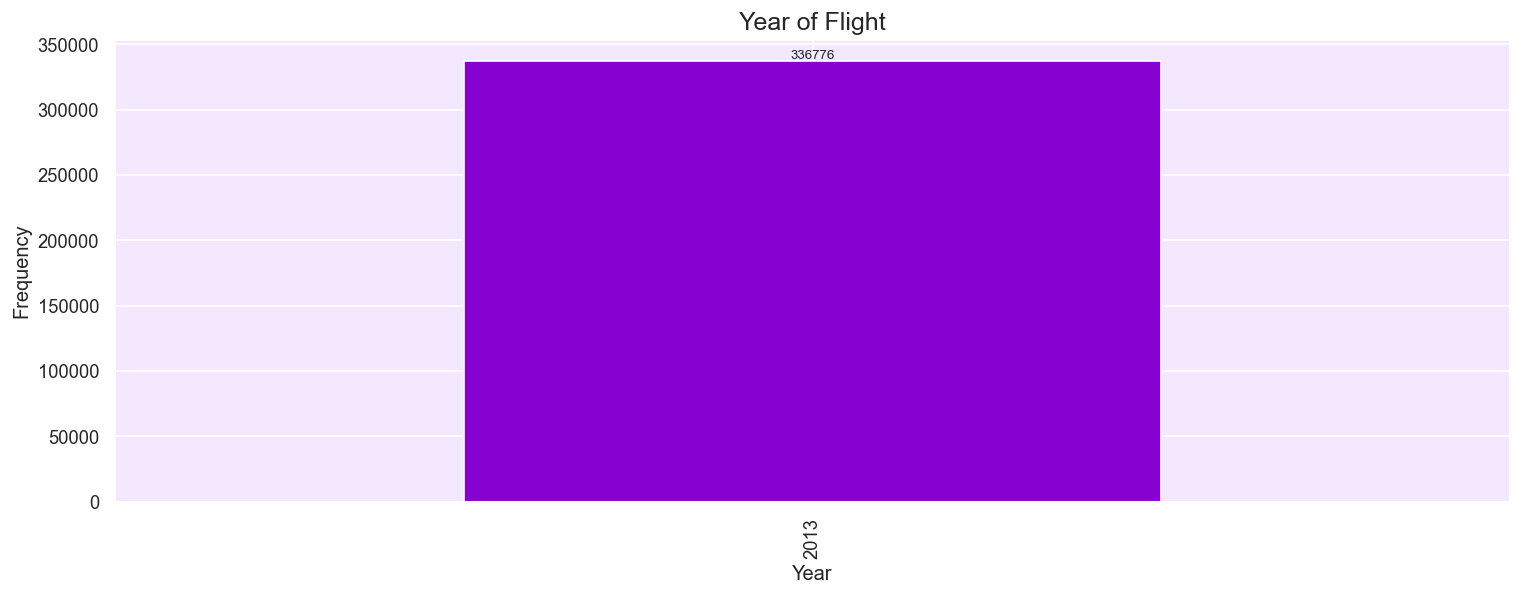

In [9]:
# The year in which the flight took place. The dataset includes flights from the year 2013.
plot_bar(df['year'], title='Year of Flight',xlabel='Year')

**Inference:**

The dataset contains flight data for only one year (**2013**), so the bar plot only has one bar.

#### 3.1.2 `month`

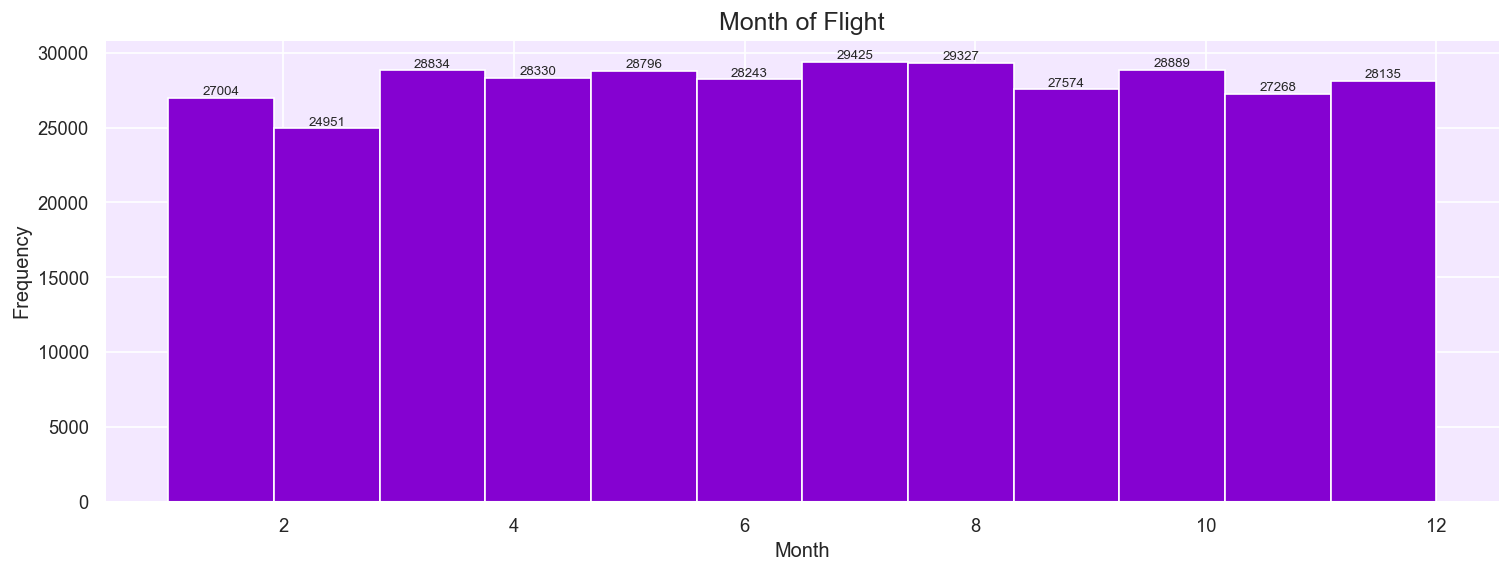

In [10]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(df['month'], bins=12, title='Month of Flight', xlabel='Month')

**Inference:**

The histogram shows that the distribution of flights across different months is approximately uniform, with **a slight decrease in February**, which is likely due to the fewer number of days in that month.

#### 3.1.3 `day`

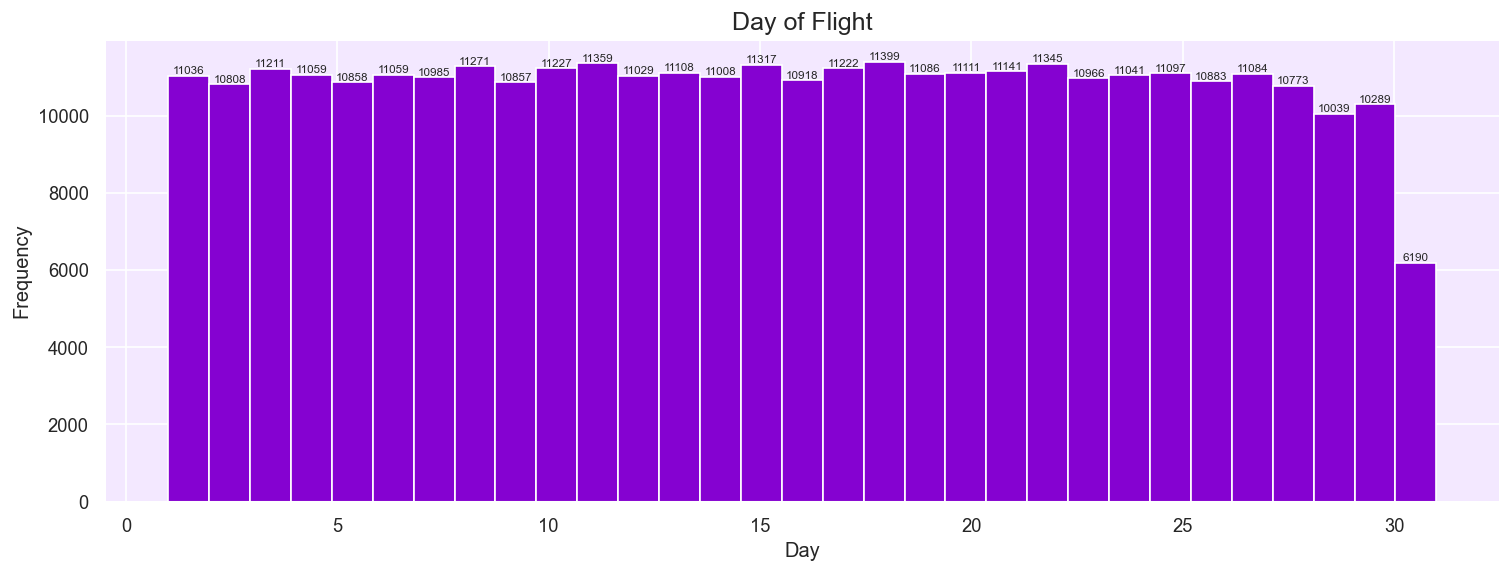

In [11]:
# The day of the month on which the flight took place, represented by an integer from 1 to 31.
plot_hist(df['day'], bins=31, xlabel='Day', title='Day of Flight', fontsize=7)

**Inference:**

The histogram reveals a mostly uniform distribution of flights across the days of the month, with slight decreases at the end of the month. These decreases are due to some months having fewer than 31 days.

#### 3.1.4 `dep_time`

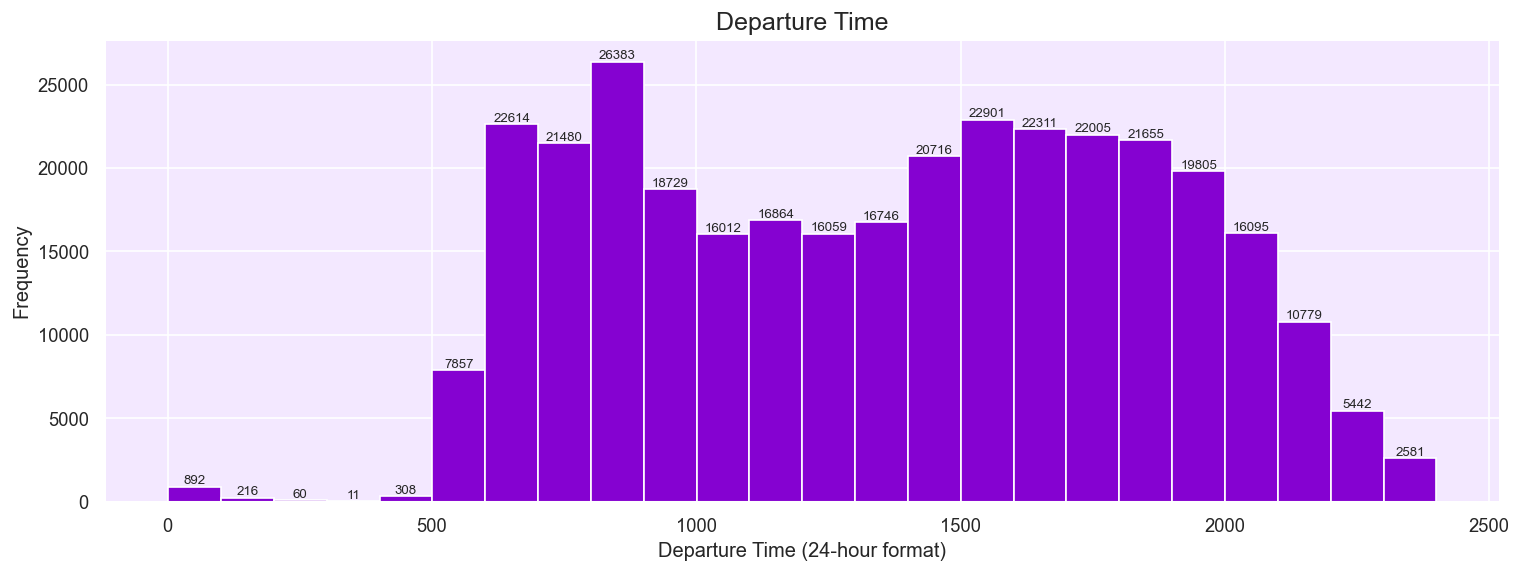

In [12]:
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

**Inference:**

The histogram shows **a bimodal distribution**, indicating two peak periods for flight departures. The first peak occurs in the morning around **06:00 hours**, and the second peak occurs in the evening around **18:00 hours**. There are fewer flights at night form 23:00 to 04:00 hours.

#### 3.1.5 `sched_dep_time`

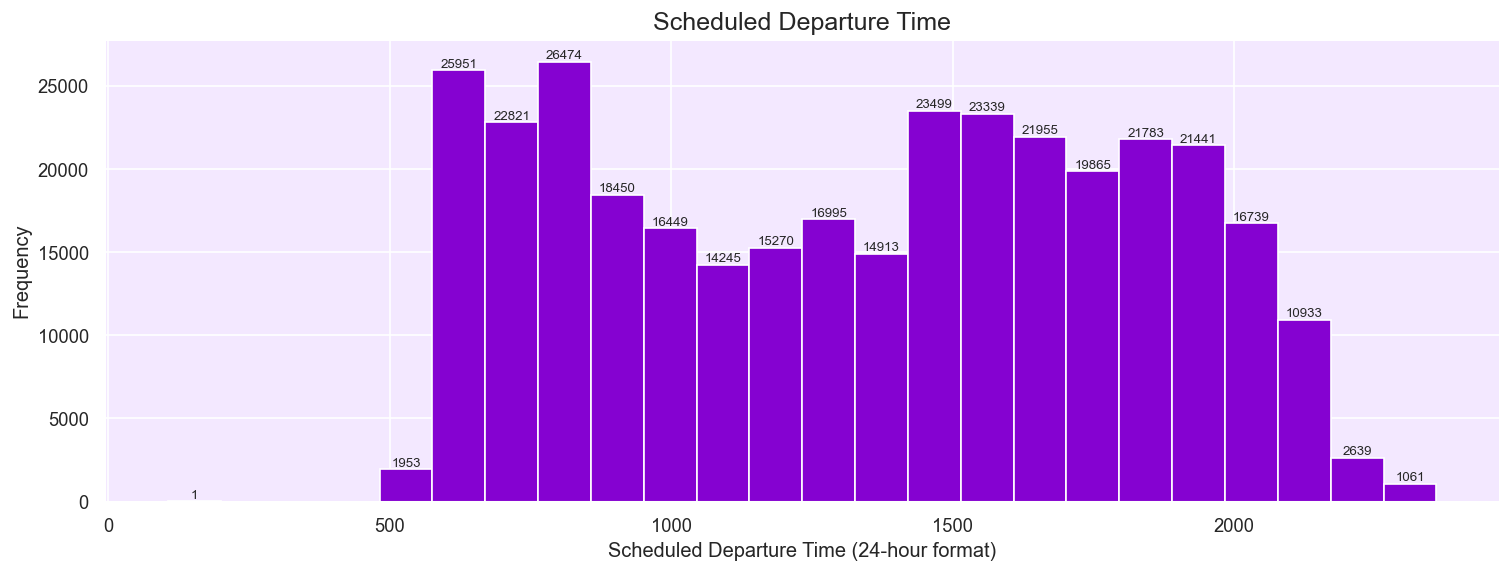

In [13]:
# The locally scheduled departure time of the flight, represented in a 24-hour format (hhmm).
plot_hist(df['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

**Inference:**

This histogram is similar to the departure time histogram. It also shows two peak periods for scheduled flight departures, which are the same as the actual departure times.

#### 3.1.6 `dep_delay`

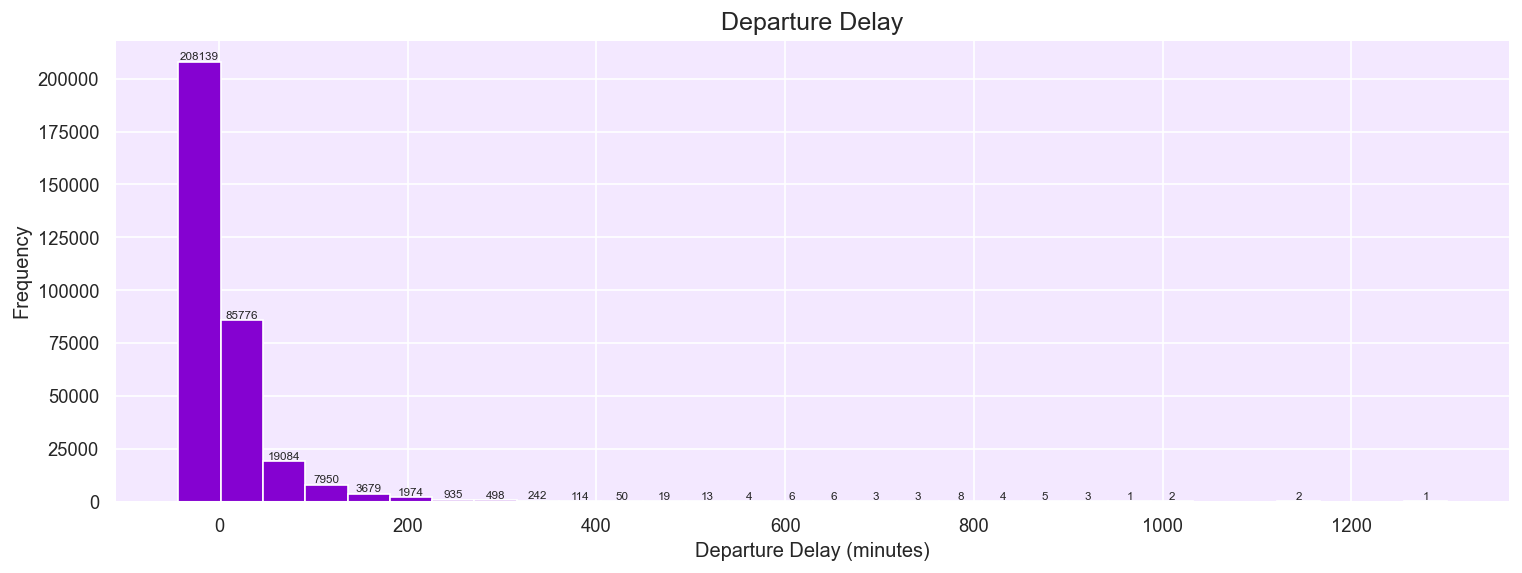

In [14]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times.
# Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

**Inference:**

The histogram indicates that most flights depart close to their scheduled departure time, as the peak of the distribution is around zero. However, there are also many flights with departure delays, shown by the long tail to the right of the distribution. 

#### 3.1.7 `arr_time`

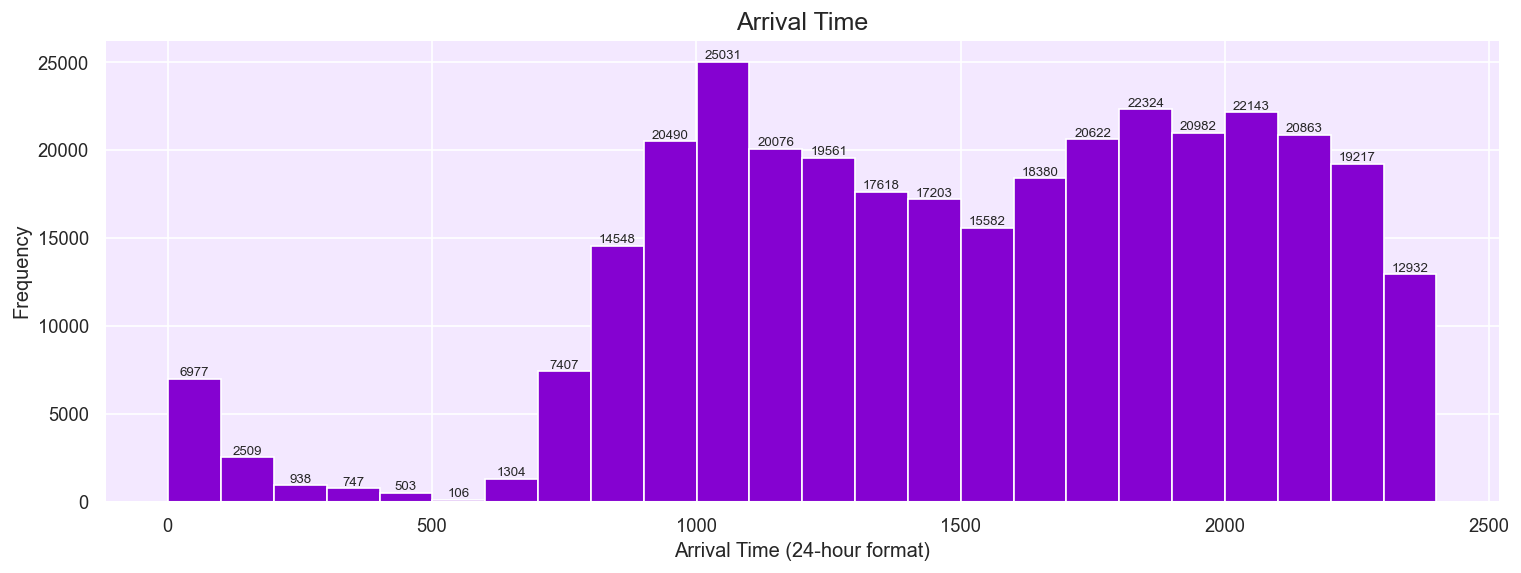

In [15]:
# The actual arrival time of the flightm represented in 24-hour format (hhmm).
plot_hist(df['arr_time'].dropna(), bins=24, title='Arrival Time', xlabel='Arrival Time (24-hour format)')

**Inference:**

The histogram shows a bimodal distribution, indicating two peak periods for flight arrivals. These are similar to the peak periods for flight departures.

#### 3.1.8 `sched_arr_time`

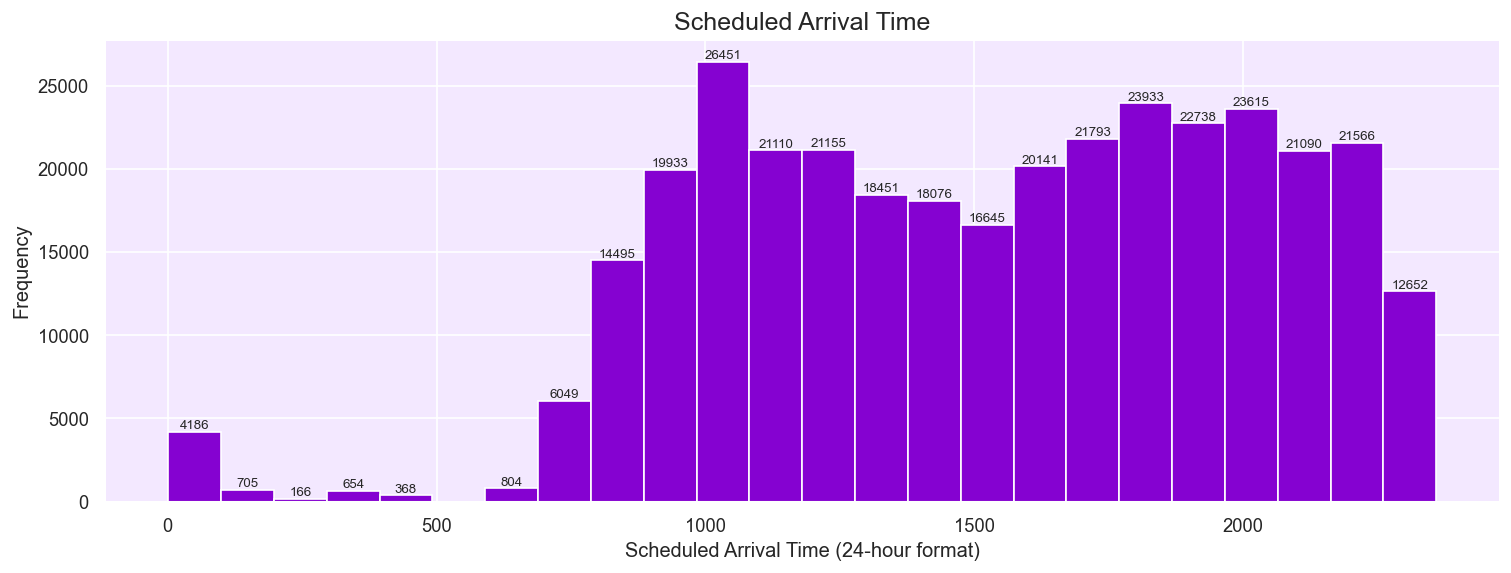

In [16]:
# The locally scheduled arrival time of the flight, represented in a 24-hour format (hhmm).
plot_hist(df['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time (24-hour format)')

**Inference:**

This histogram is similar to the arrival time histogram, indicating that the scheduling is consistent with the actual times.

#### 3.1.9 `arr_delay`

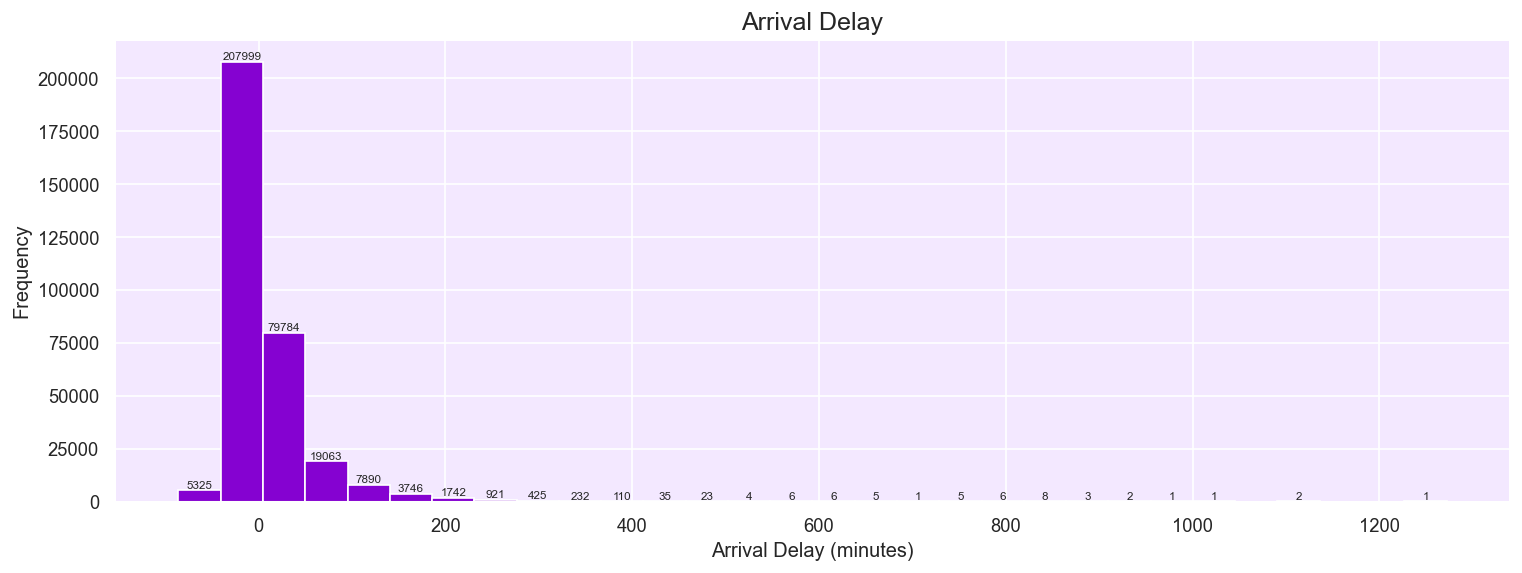

In [20]:
# The delay in flight arrival calculated as the difference (in minutes) between the actual and scheduled arrival times.
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

**Inference:**

The histogram shows that most flights arrive close to their scheduled arrival time, as the peak of the distribution is around zero. However, there are also many flights with arrival delays, shown by the long tail to the right of the distribution.

#### 3.1.10 `carrier`

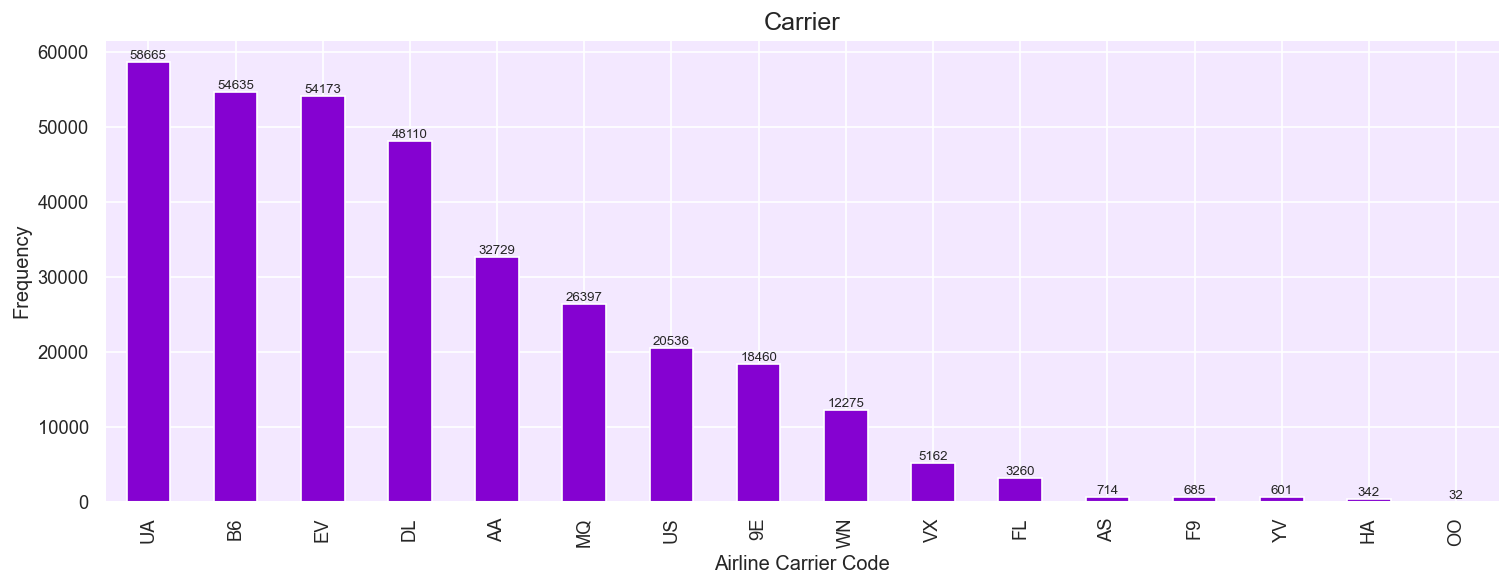

In [21]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(df['carrier'], title='Carrier', xlabel='Airline Carrier Code')

**Inference:**

The bar plot shows that the carriers with the codes **UA**, **B6**, **EV**, and **DL** operate the most flights in this dataset.

#### 3.1.11 `origin`

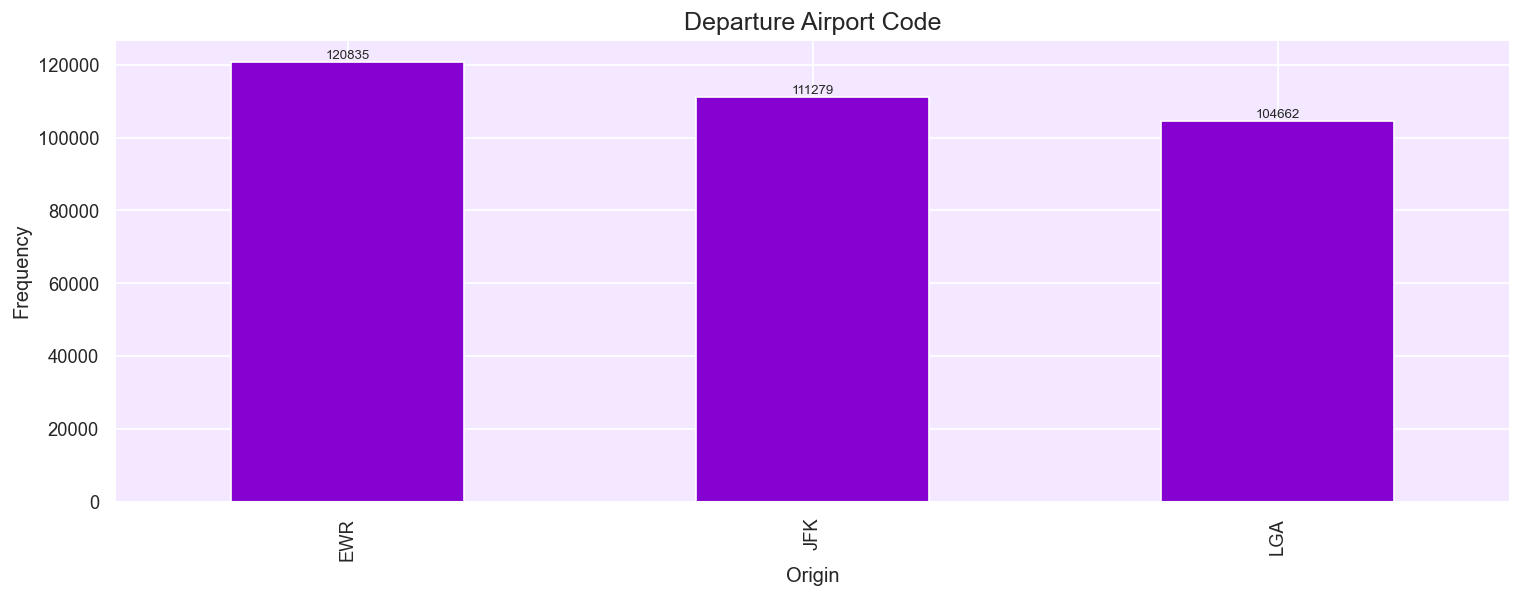

In [22]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

**Inference:**

The bar plot reveals that the majority of flights in this dataset depart from the airport with the code **EWR**.

#### 3.1.12 `dest`

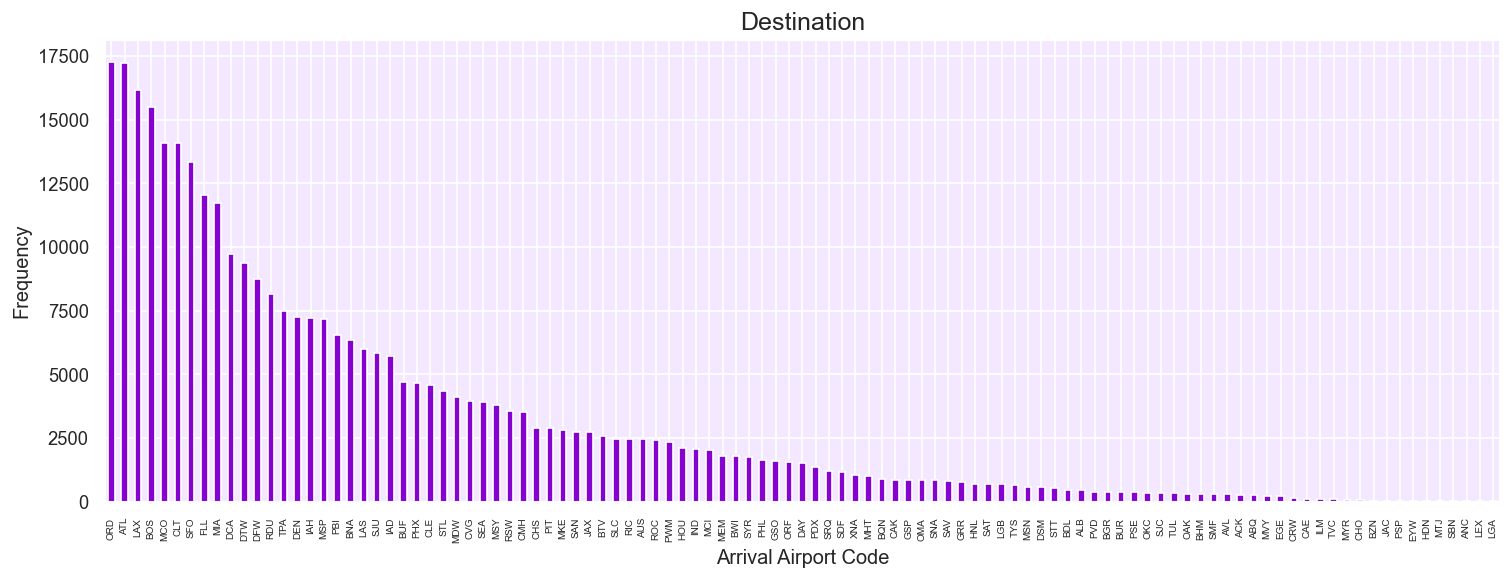

In [23]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

**Inference:**

The bar plot shows that the most common destination airports are **ORD**, **ATL**, and **LAX**.

#### 3.1.13 `air_time`

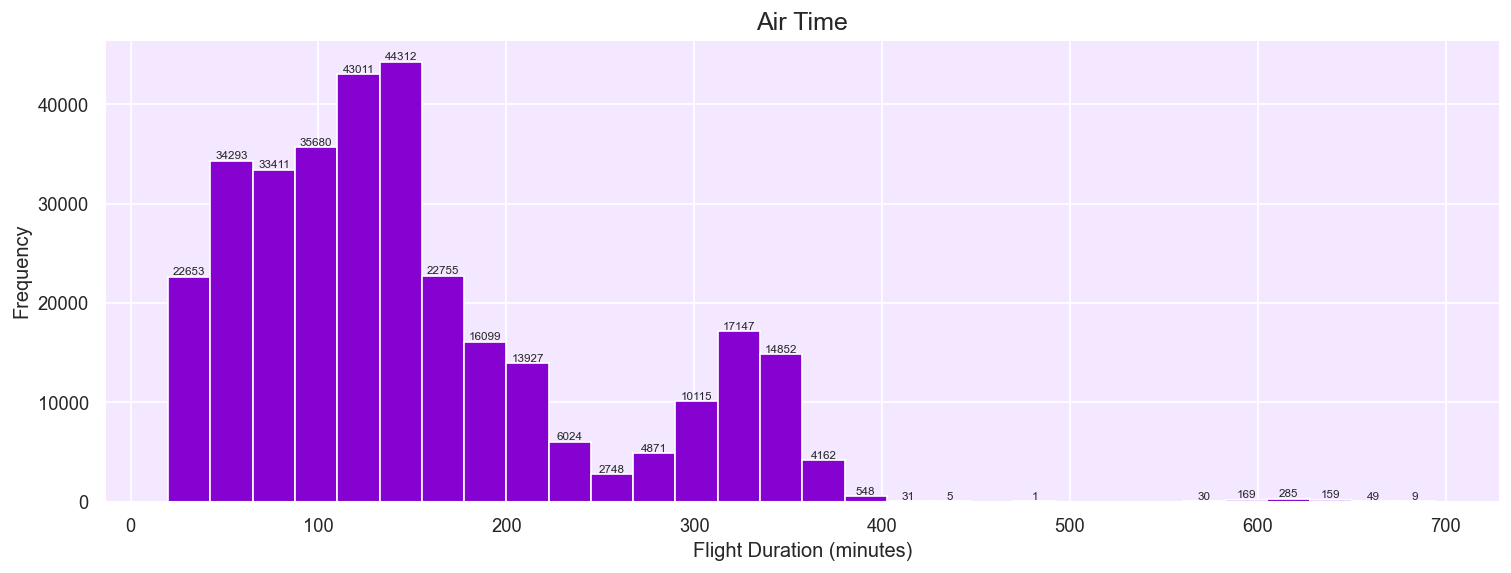

In [24]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

**Inference:**

The histogram shows that most flights have an air time of around 50 to 200 minutes, with a few flights having significantly longer air times.

#### 3.1.14 `distance`

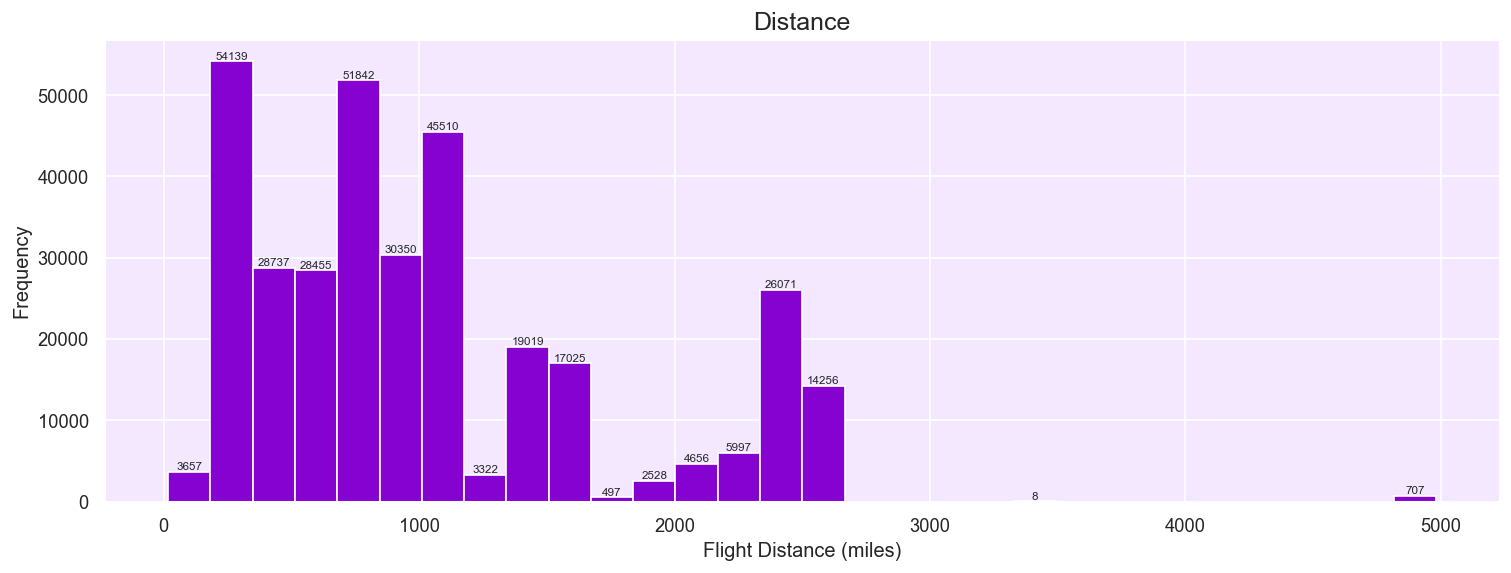

In [25]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(df['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

**Inference:**

This histogram shows that most flights travel a distance of around 500 to 1000 miles, with a few flights significantly longer distance. 

#### 3.1.15 `hour`

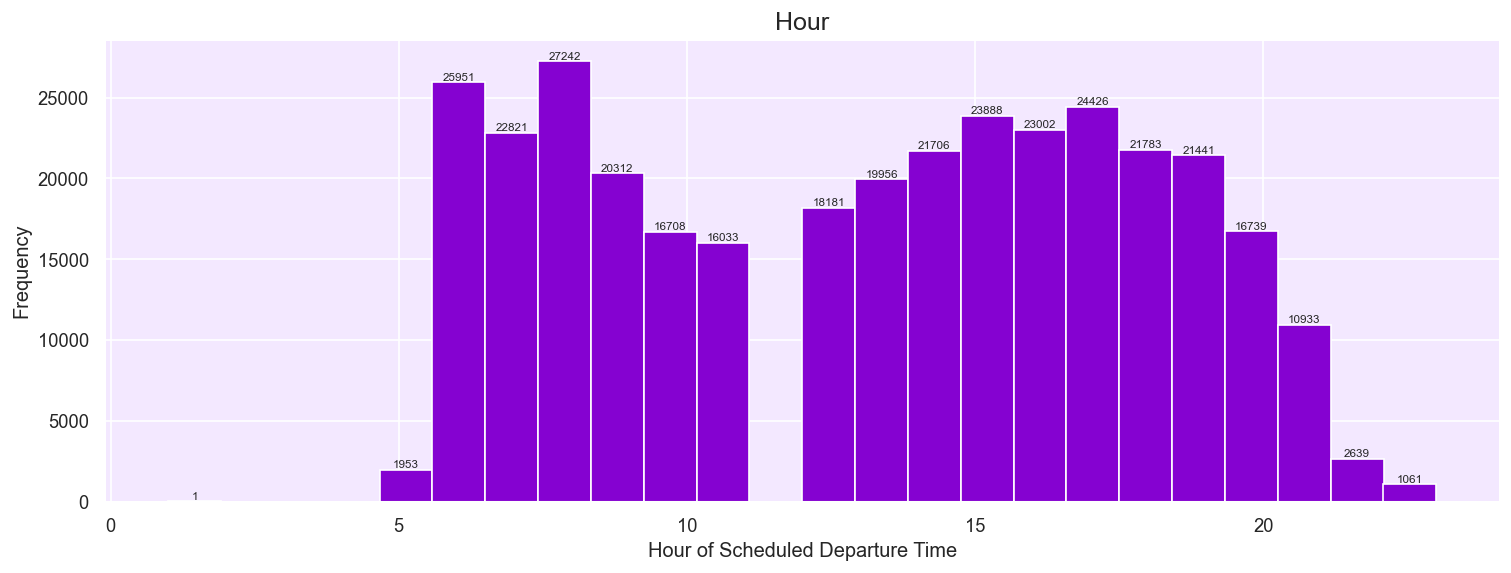

In [26]:
# The hour component of the scheduled departure time, expressed in local time.
plot_hist(df['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

**Inference:**

The histogram reveals two peak periods for the hour component of the scheduled departure time, which correspond to the morning and the evening peaks observed in the departure tine histograms.

#### 3.1.16 `minute`

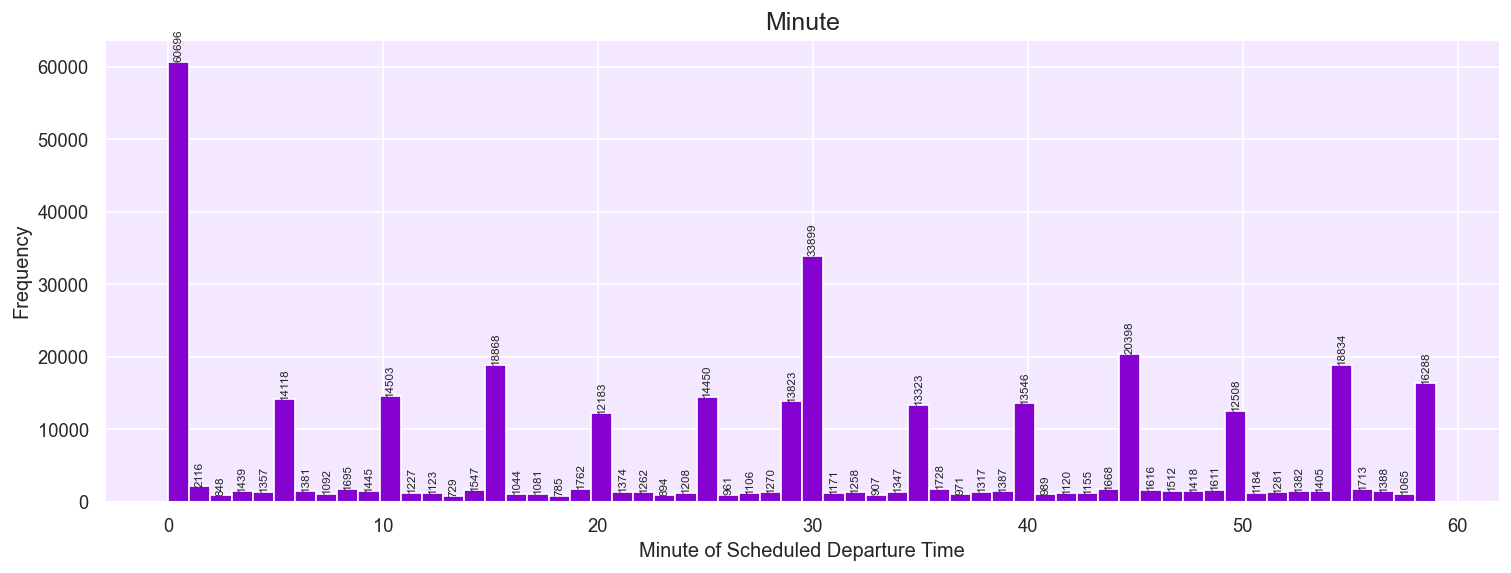

In [27]:
# The minute component of the scheduled departure time, expressed in local time.
plot_hist(df['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

**Inference:**

The histogram shows almost a uniform distribution for the minute component of the scheduled departure time, indicating that flights are evenly scheduled across all minutes of an hour.

#### 3.1.17 `name`

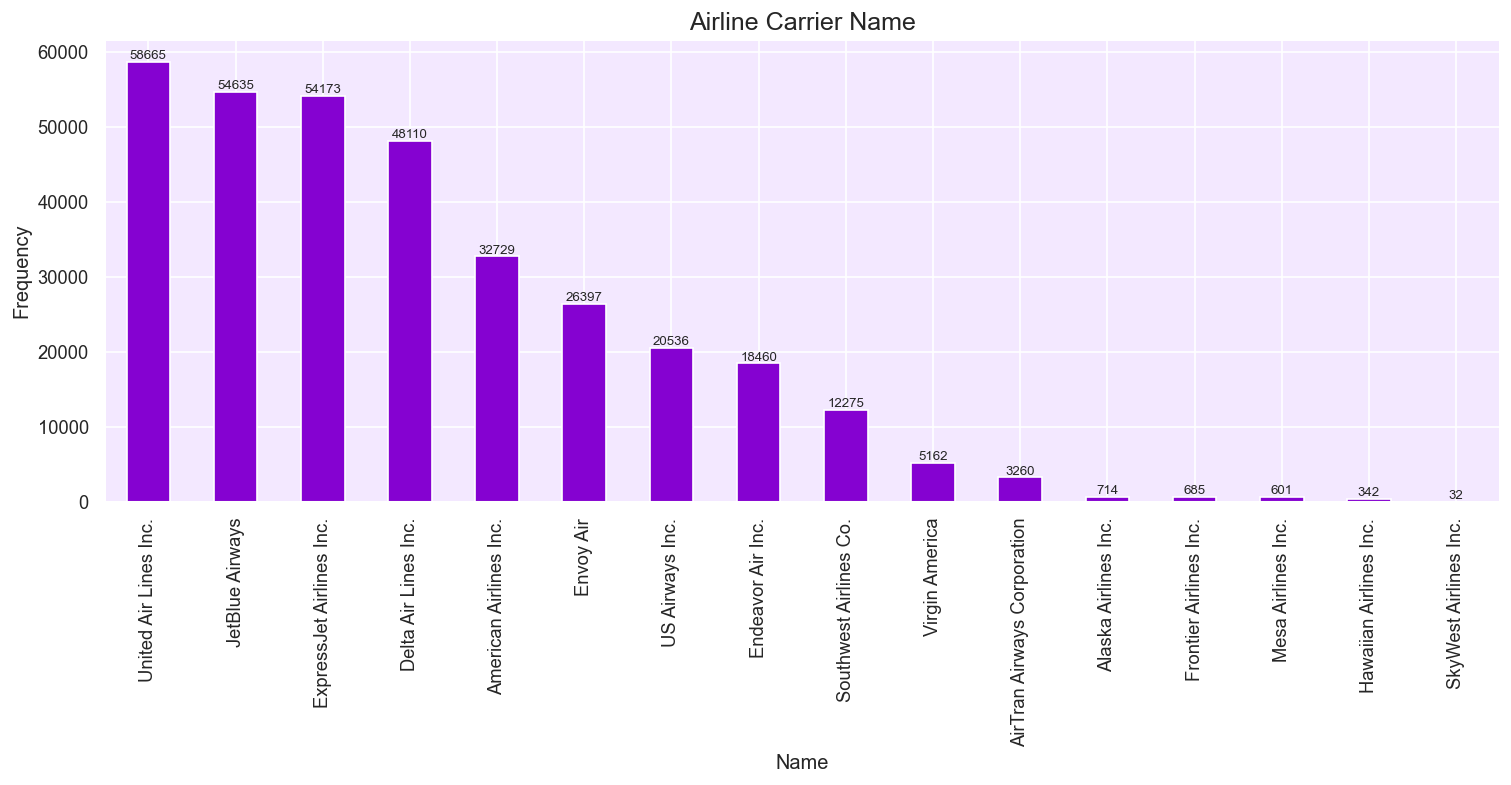

In [28]:
# The full name of the airline carrier responsible for the flight.
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

**Inference:**

The bar plot shows that **United Air Lines Inc., JetBlue Airways,** and **ExpressJet Airlines Inc.** are the airlines that operate the most flights in this dataset.

**Notes:**

* Since `id`, `flight`, `tailnum` are just **unique identifiers (containing many unique values)** for each flight and does not provide any meaningful information, we skipped plotting them.

* The `time_hour` (scheduled departure time of the flight), represented in local time and formatted as **yyyy-mm-dd hh:mm:ss**. This column contains datetime information which is already represented by the `year`, `month`, `day`, `hour`, and `minute` columns, so we skipped plotting it as well.

### 3.2 Bivariate Analysis

For our bivariate analysis, we'll consider the `arr_delay` column as the **target**. We can analyze the relationship between `arr_delay` and other columns. To do this, wa can use **scatter plots** for **numerical columns** and **violin plots** for **categorical columns**. We skip `id`, `flight`, `tailnum`, `time_hour` as they are identifiers or contain redundant information

In [29]:
# Define color palette with different shades of color #8502d1 fro boxplots
color_box = sns.dark_palette("#8502d1", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#8502d1", as_cmap=True)

# Define the function to plot scatter plots:
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot violin plots
def plot_violin(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.violinplot(x=x, y=y, palette=color_box)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90,fontsize=fontsize)
    plt.show()

#### 3.2.1 `Year` vs `Arrival Delay`

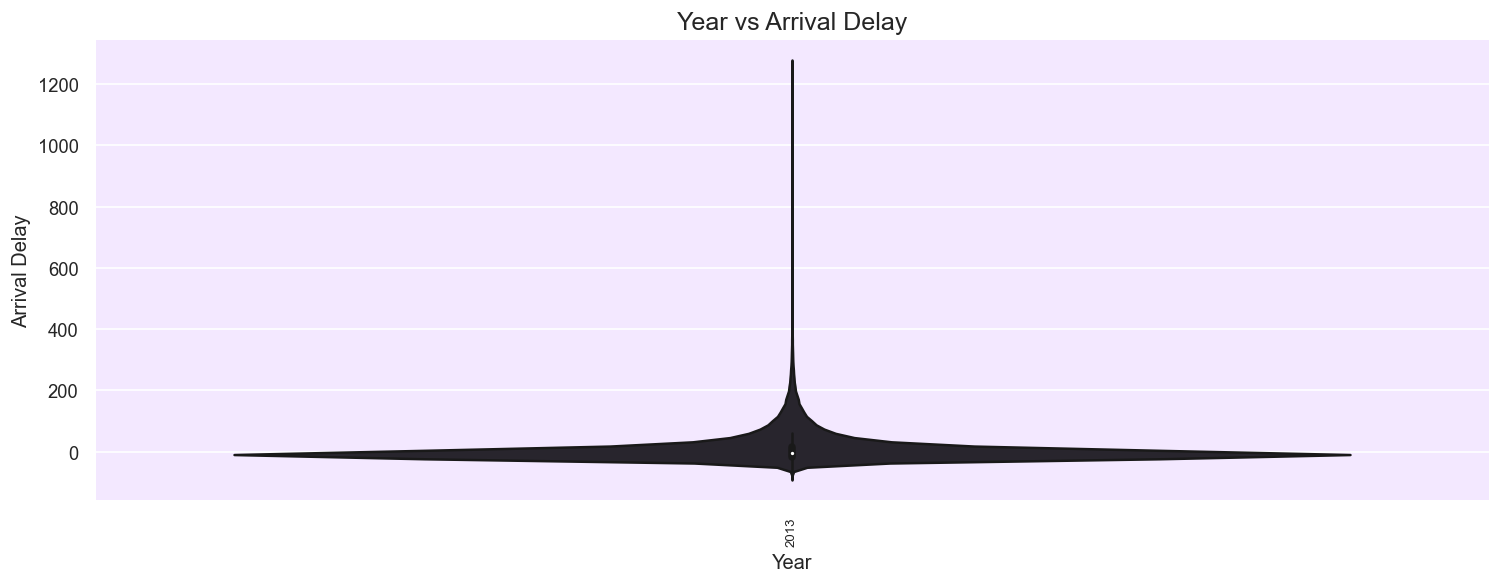

In [30]:
# year vs arr_delay
plot_violin(df['year'], df['arr_delay'], 'Year vs Arrival Delay', 'Year', 'Arrival Delay')

**Inference:**

The violin plot does not provide much information as the dataset contains flights from only one year.

#### 3.2.2 `Month` vs `Arrival Delay`

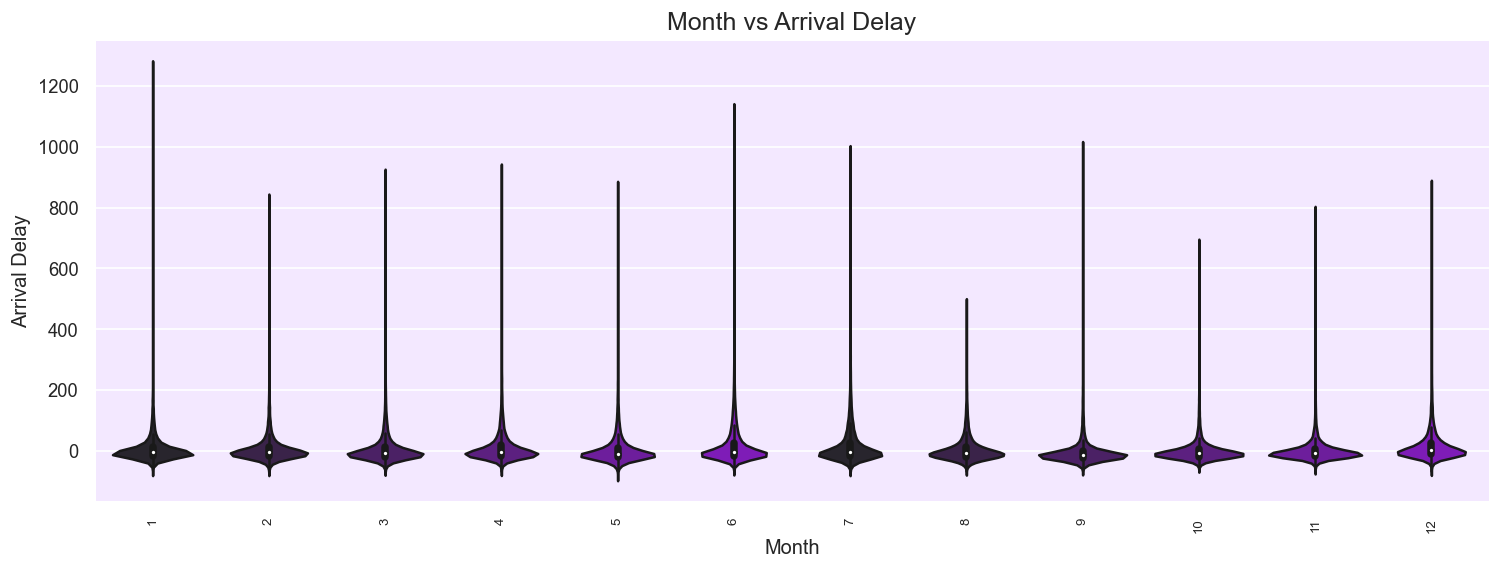

In [31]:
# month vs arr_delay
plot_violin(df['month'], df['arr_delay'], 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

**Inference:**

The violin plot shows that the distribution of arrival delays varies by month. Some months (like **January**, **June**, **July** and **September**) have wider distributions, indicating a higher variability in arrival delays.

#### 3.2.3 `Day` vs `Arrival Delay`


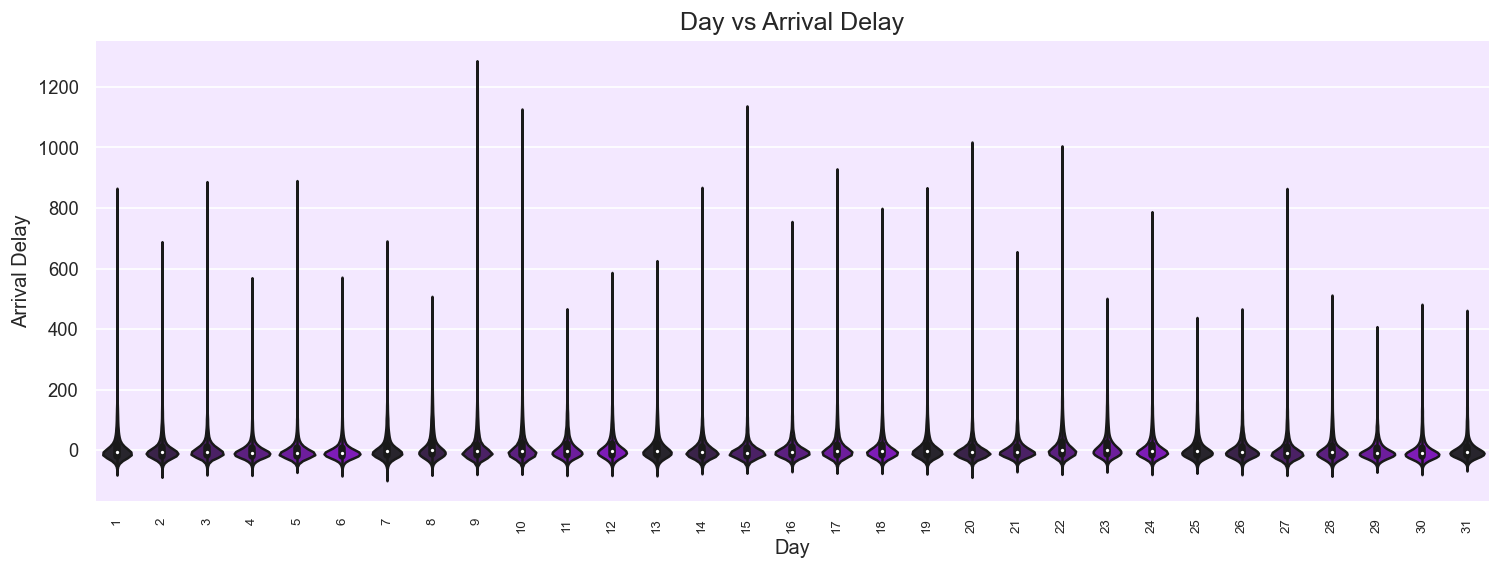

In [32]:
# day vs arr_delay
plot_violin(df['day'], df['arr_delay'], 'Day vs Arrival Delay', 'Day', 'Arrival Delay')

**Inference:**

The violin plot indicates that the day of the month does not have a significant impact on the distribution of arrival delays.

#### 3.2.4 `Departure Time` vs `Arrival Delay`


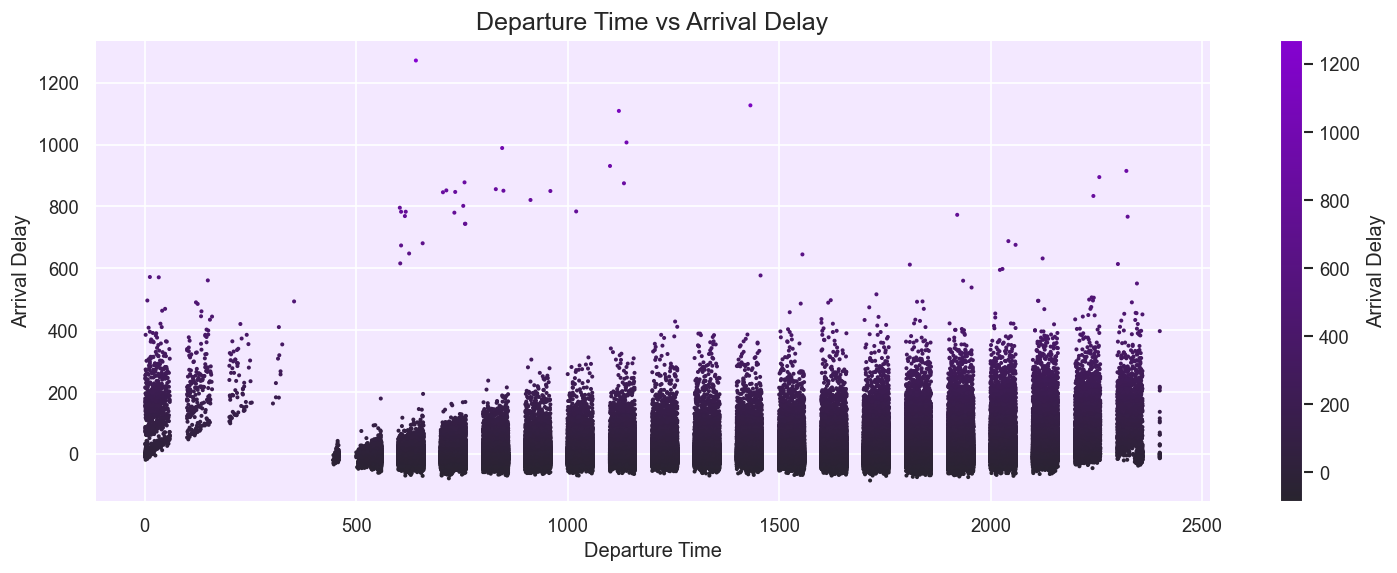

In [33]:
# dep_time vs arr_delay
plot_scatter(df['dep_time'], df['arr_delay'], 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

**Inference:**

The scatter plot shows a slight trend indicating that flights departing later in the day tend to have more delays.

#### 3.2.5 `Scheduled Departure Time` vs `Arrival Delay`


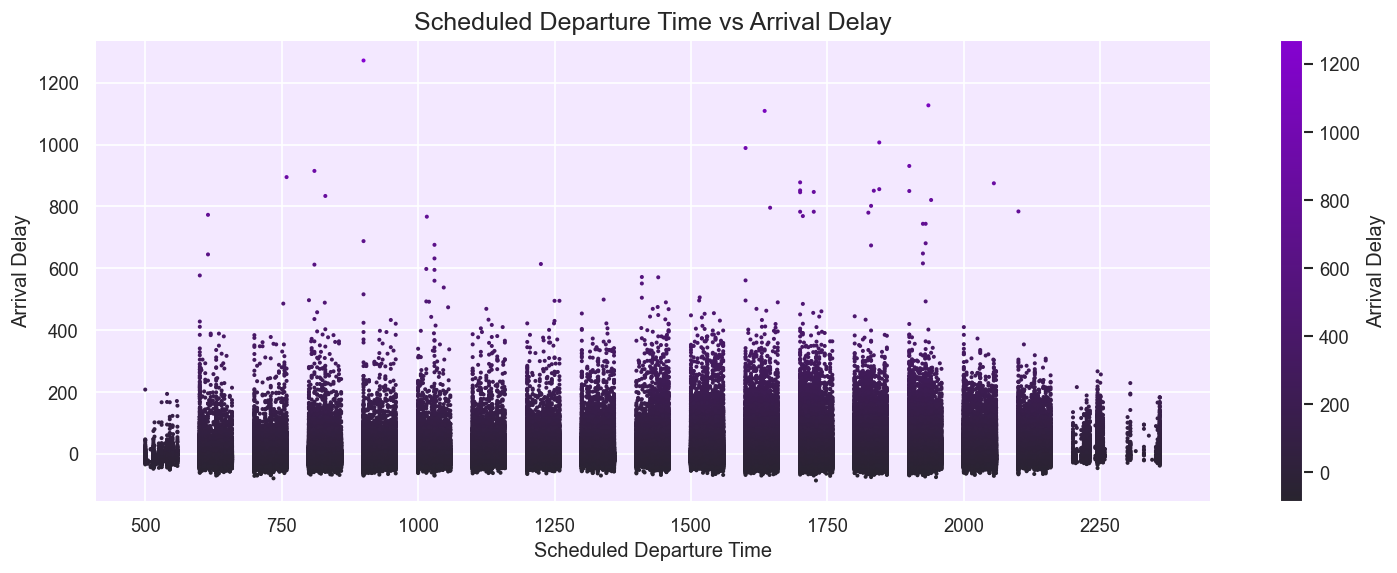

In [34]:
# sched_dep_time vs arr_delay
plot_scatter(df['sched_dep_time'], df['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

**Inference:**

This plot shows a similar pattern to the previous one, indicating that flights scheduled to depart later in the day tend to have more delays.

#### 3.2.6 `Departure Delay` vs `Arrival Delay`

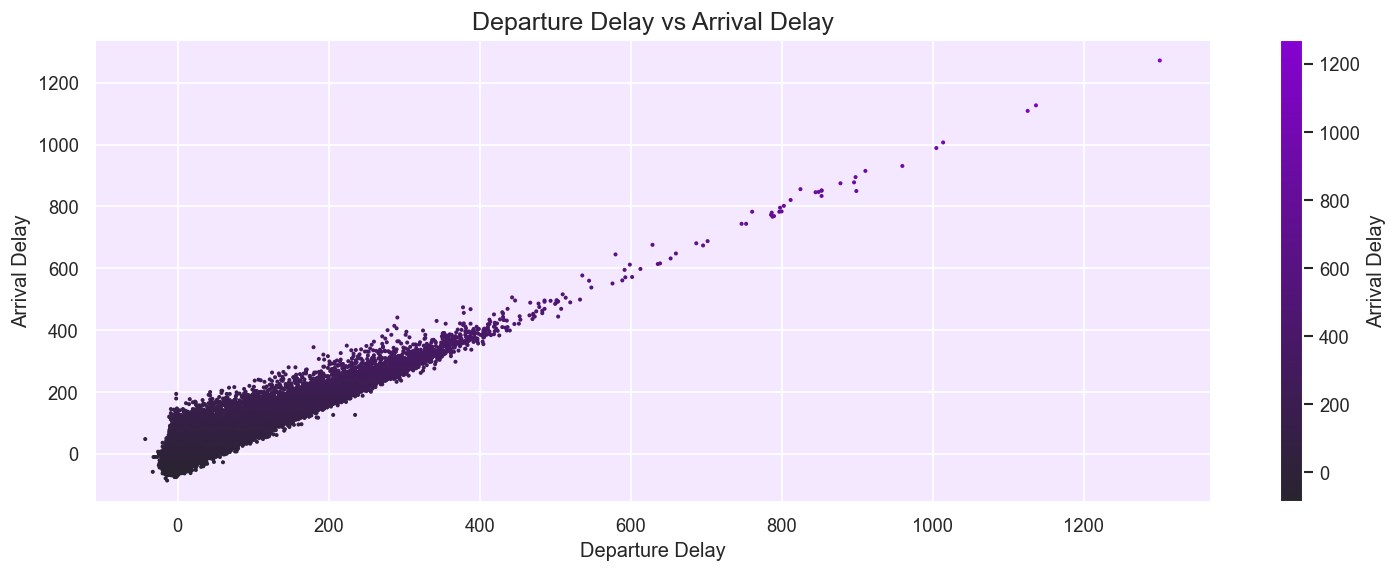

In [35]:
# dep_delay vs arr_delay
plot_scatter(df['dep_delay'], df['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

**Inference:**

As expected, there is a strong positive correlation between departure delay and arrival delay.

#### 3.2.7 `Arrival Time` vs `Arrival Delay`

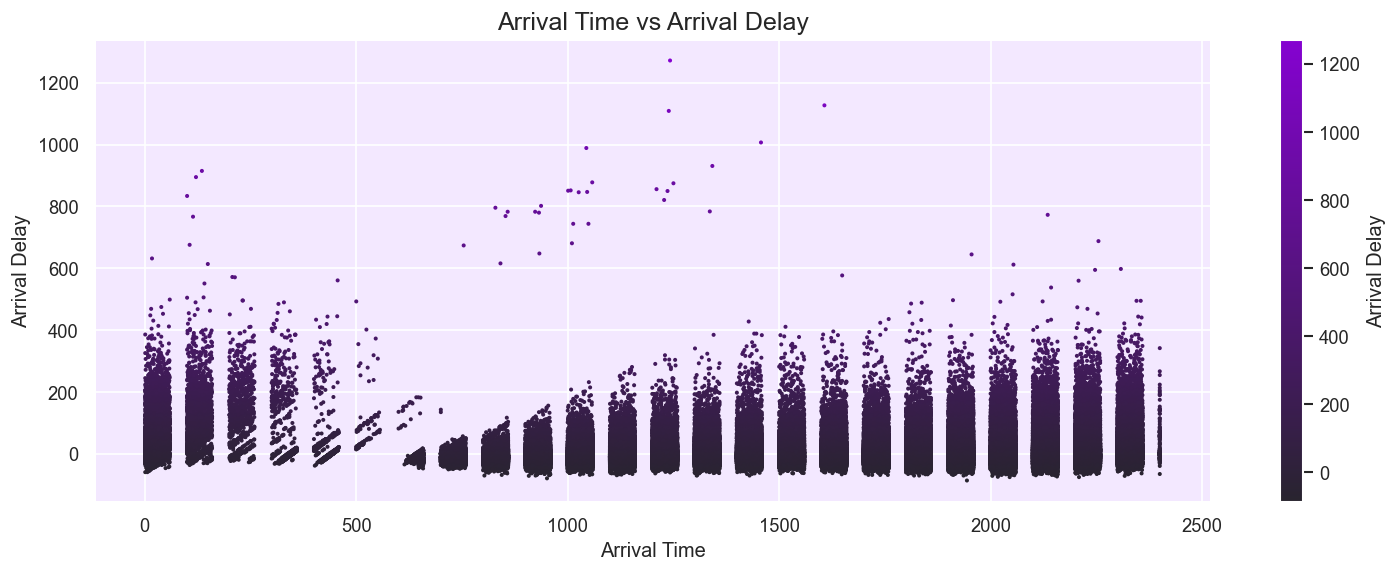

In [36]:
# arr_time vs arr_delay
plot_scatter(df['arr_time'], df['arr_delay'], 'Arrival Time vs Arrival Delay', 'Arrival Time', 'Arrival Delay')

**Inference:**

The scatter plot shows that flights arriving later in the day tend to have more delays, which is consistent with the departure time observations.

#### 3.2.8 `Scheduled Arrival Time` vs `Arrival Delay`

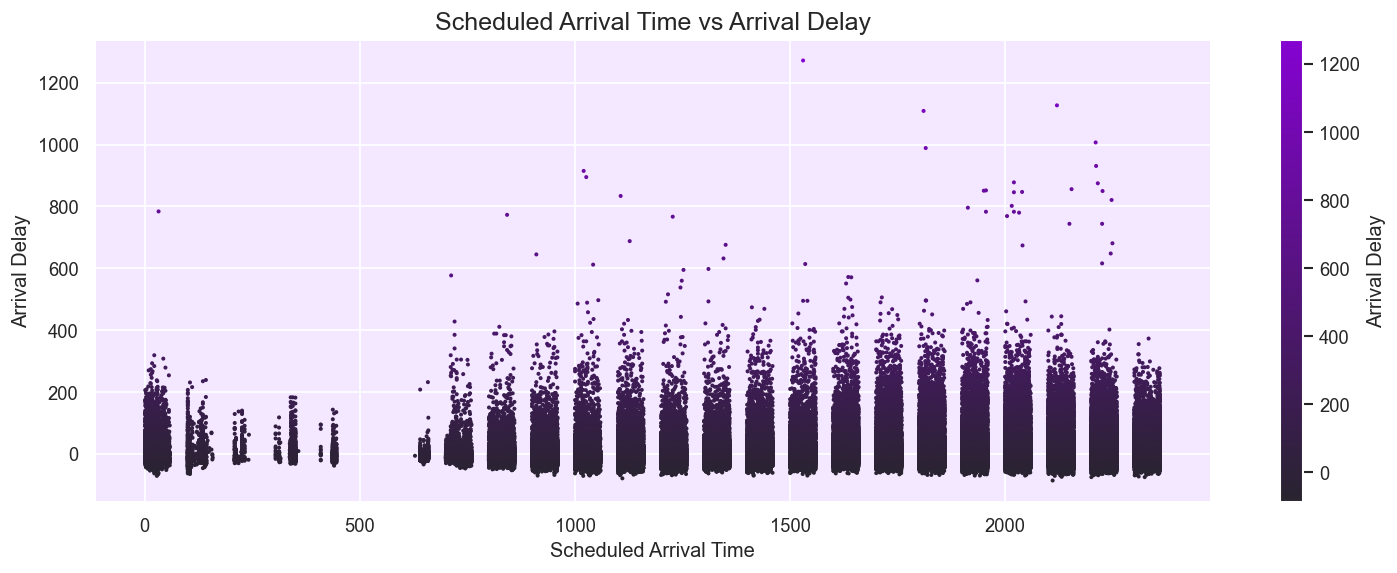

In [37]:
# sched_arr_time vs arr_delay
plot_scatter(df['sched_arr_time'], df['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')

**Inference:**

This plot also shows that flights scheduled to arrive later in the day tend to have more delays.

#### 3.2.9 `Carrier` vs `Arrival Delay`

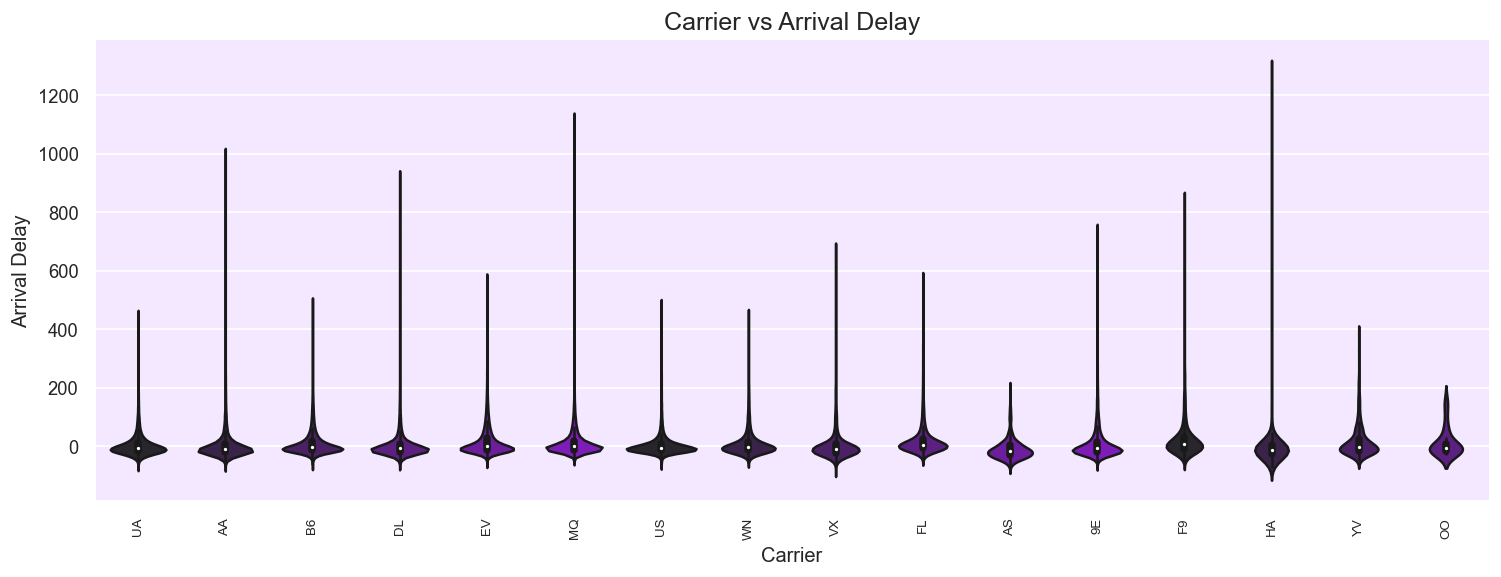

In [38]:
# carrier vs arr_delay
plot_violin(df['carrier'], df['arr_delay'], 'Carrier vs Arrival Delay', 'Carrier', 'Arrival Delay')

**Inference:**

The violin plot shows that different carriers have different distributions of arrival delays. Some carriers tend to have more severe delays, while others have milder delays.

#### 3.2.10 `Origin` vs `Arrival Delay`

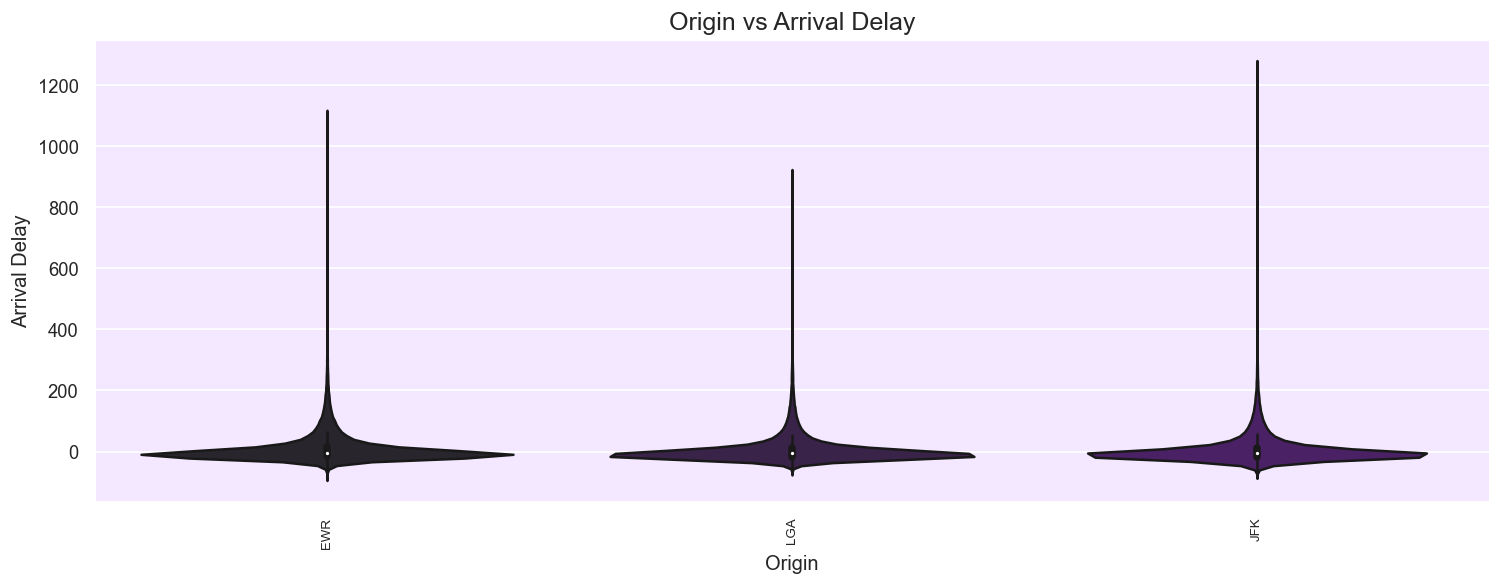

In [39]:
# origin vs arr_delay
plot_violin(df['origin'], df['arr_delay'], 'Origin vs Arrival Delay', 'Origin', 'Arrival Delay')

**Inference:**

The violin plot shows that flights from different origins have different distributions of arrival delays. Some airports tend to have flights with more severe delays, while others have flights with milder delays.

#### 3.2.11 `Destination` vs `Arrival Delay`

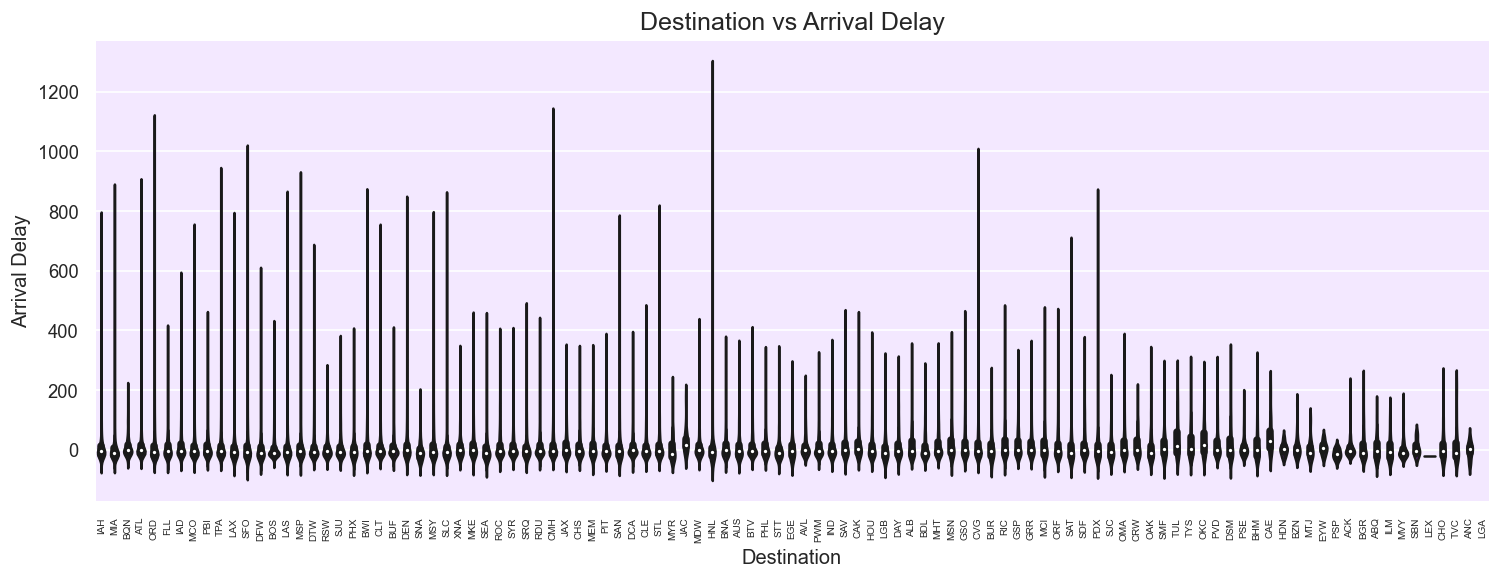

In [40]:
# dest vs arr_delay
plot_violin(df['dest'], df['arr_delay'], 'Destination vs Arrival Delay', 'Destination', 'Arrival Delay', fontsize=6)

**Inference:**

The violin plot shows that flights going to different destinations have different distributions of arrival delays. Some destination airports tend to receive flights with more severe delays, while others receive flights with milder delays.

#### 3.2.12 `Air Time` vs `Arrival Delay`

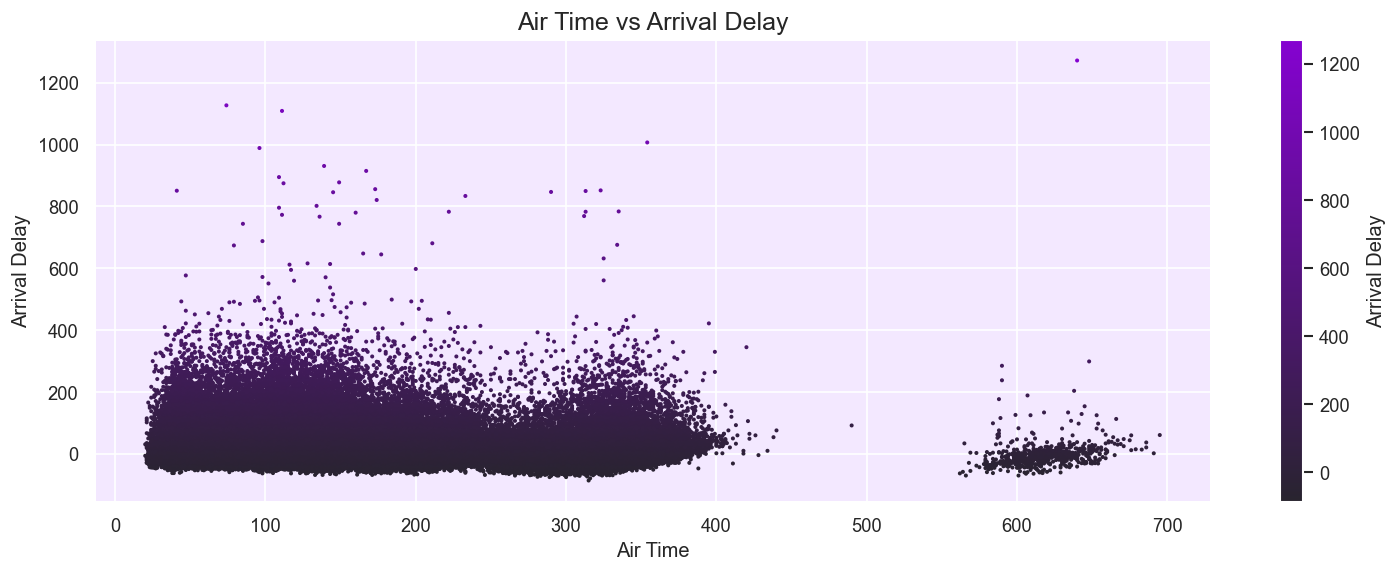

In [41]:
# air_time vs arr_delay
plot_scatter(df['air_time'], df['arr_delay'], 'Air Time vs Arrival Delay', 'Air Time', 'Arrival Delay')

**Inference:**

The scatter plot does not show a clear trend, suggesting that the duration of the flight (`air_time`) does not have a significant impact on the arrival delay.

#### 3.2.13 `Distance` vs `Arrival Delay`

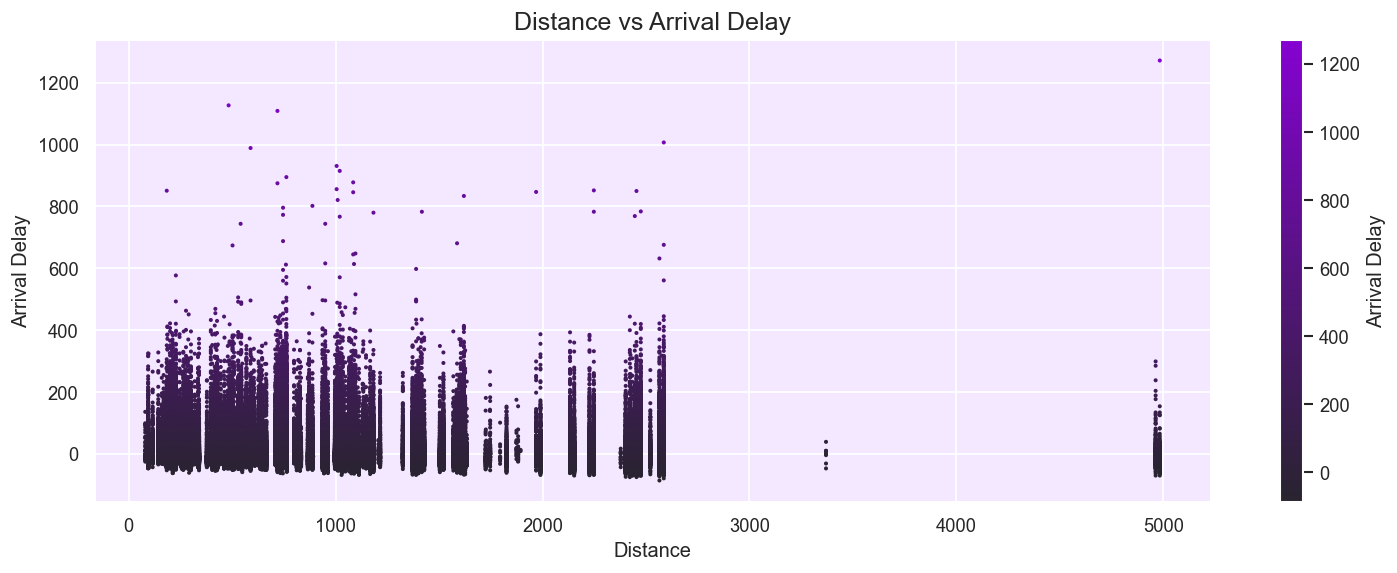

In [42]:
# distance vs arr_delay
plot_scatter(df['distance'], df['arr_delay'], 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

**Inference:**

This plot also does not show a clear trend, indicating that the distance of the flight does not have a significant impact on the arrival delay.

#### 3.2.14 `Hour` vs `Arrival Delay`

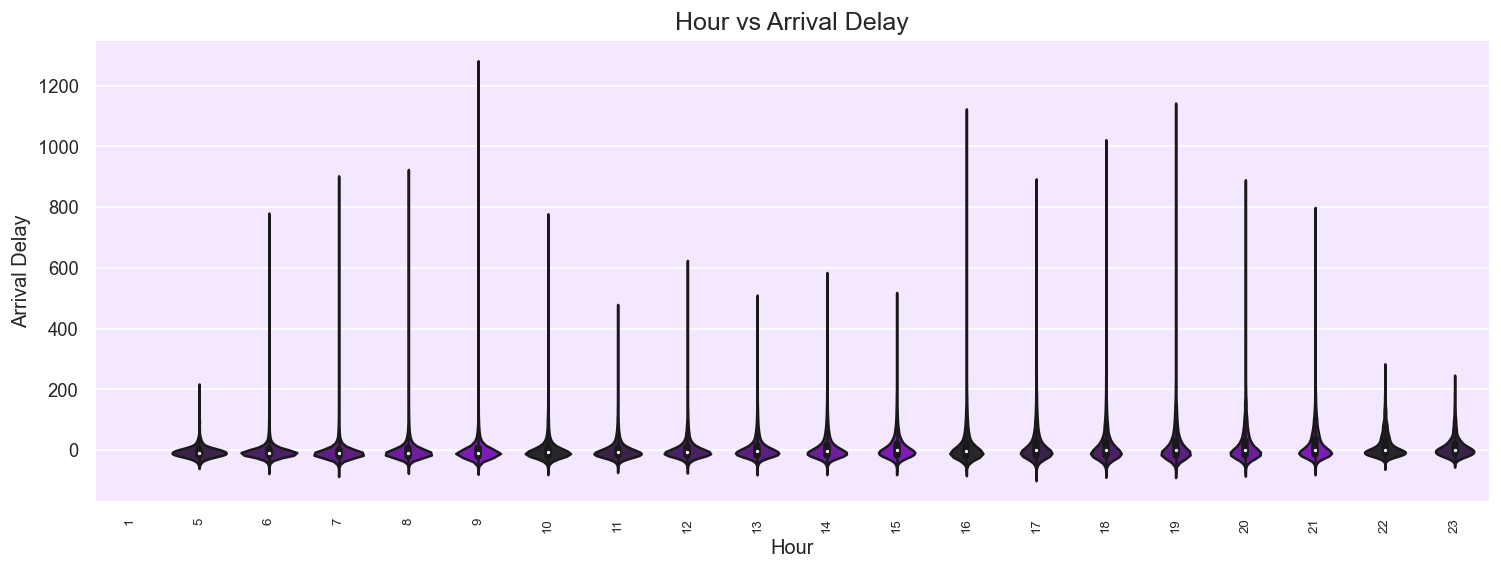

In [43]:
# hour vs arr_delay
plot_violin(df['hour'], df['arr_delay'], 'Hour vs Arrival Delay', 'Hour', 'Arrival Delay')

**Inference:**

The violin plot shows that flights departing at different hours of the day have different distributions of arrival delays. Flights departing later in the day tend to have a higher variability in arrival delays.

#### 3.2.15 `Minute` vs `Arrival Delay`

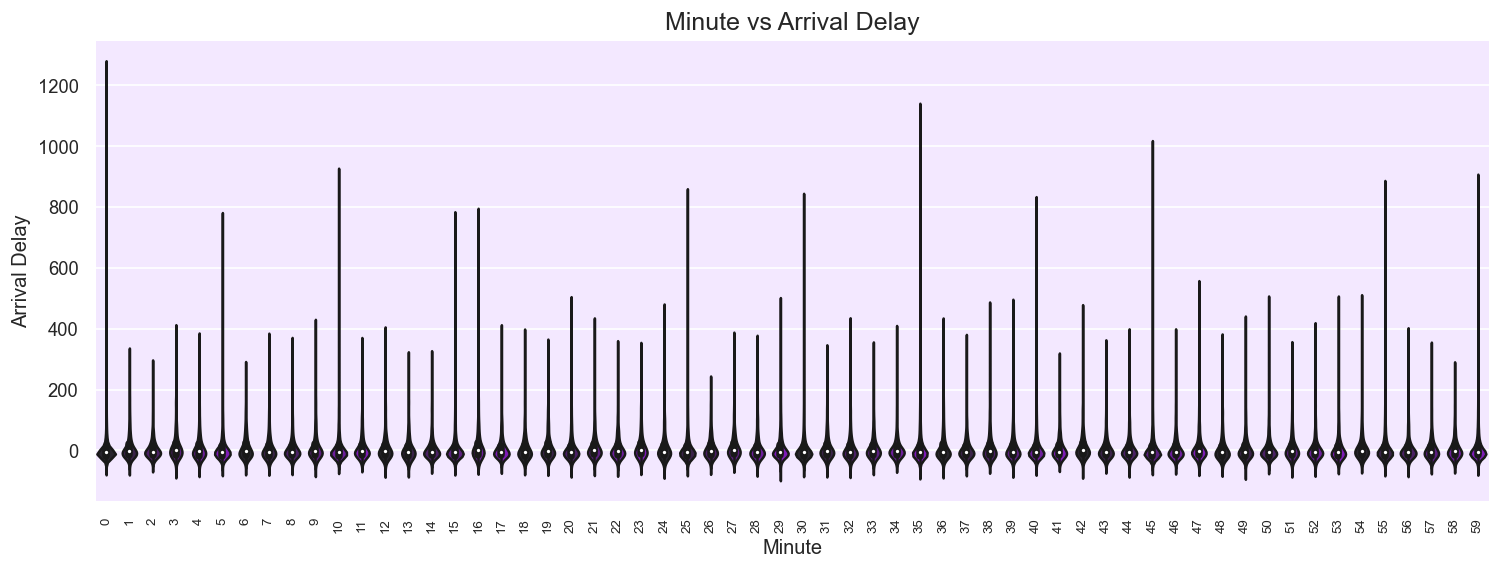

In [44]:
# minute vs arr_delay
plot_violin(df['minute'], df['arr_delay'], 'Minute vs Arrival Delay', 'Minute', 'Arrival Delay')

**Inference:**

The violin plot suggests that the minute of the hour of the departure time does not have a significant impact on the distribution of arrival delays.

#### 3.2.16 `Name` vs `Arrival Delay`

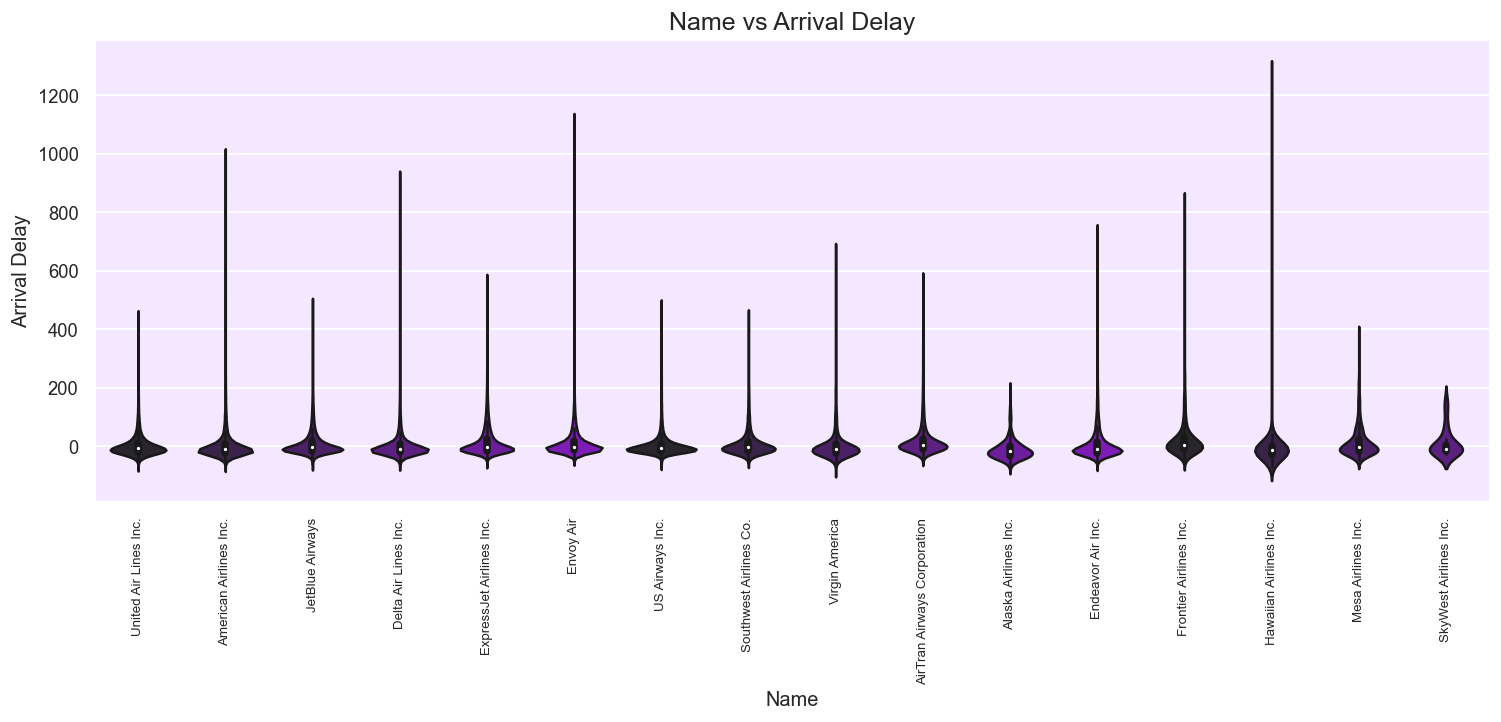

In [45]:
# name vs arr_delay
plot_violin(df['name'], df['arr_delay'], 'Name vs Arrival Delay', 'Name', 'Arrival Delay')

**Inference:**

This violin plot shows that different airline (represented by their names) have different distributions of arrival delays. Some airlines tend to have more severe delays, while others have milder delays.

**Notes:**

Based on the bivariate analysis, the features that have a noticeable impact on arrival delay are:
* Month
* Departure Time and Scheduled Departure Time
* Departure Delay
* Arrival Time and Scheduled Arrival Time
* Carrier
* Origin
* Destination
* Hour

 On the other hand, the following features **do not** seem to significantly **influence arrival delay:**
* Day
* Air Time
* Distance
* Minute
    

### 3.3 Multivariate Analysis

A multivariate analysis will allow us to understand the interactions between different features of the dataset and how they collectively impact the target variable (`‍‍‍arr_delay`).

Due to the complexity of multivariate plots, we will only consider a few key features. The choice of these features is based on the results from the bivariate analysis: `month`, `dep_time`, `dep_delay`, `carrier`, `origin`, `dest`, and `hour`.

#### 3.3.1 Correlation between Numerical Features

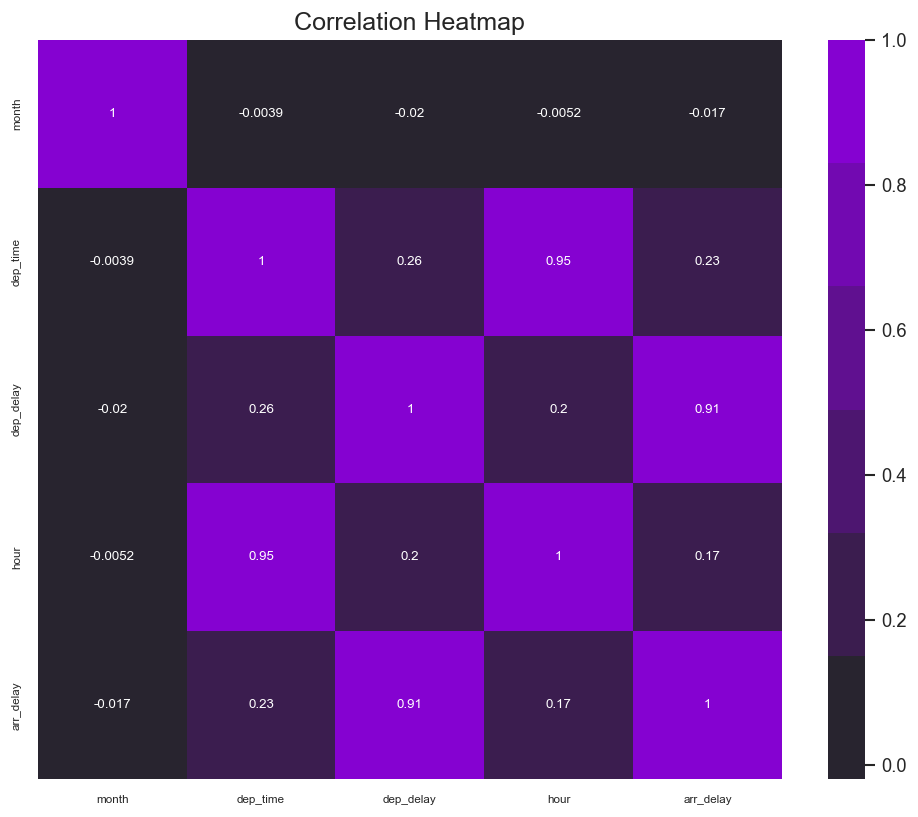

In [50]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour', 'arr_delay']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=color_multi, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

**Inference:**

The heatmap shows the correlation coefficients between the numeric features. `dep_delay` has a strong positive correlation with `arr_delay`, which means that as the departure delay increases, the arrival delay also tends to increase. The other features (`month`, `dep_time`, and `hour`) show very weak correlations with `arr_delay`, suggesting that these features by themselves do not strongly influence the arrival delay.

#### 3.3.2 `dep_delay` vs `dep_time` across different `carrier`

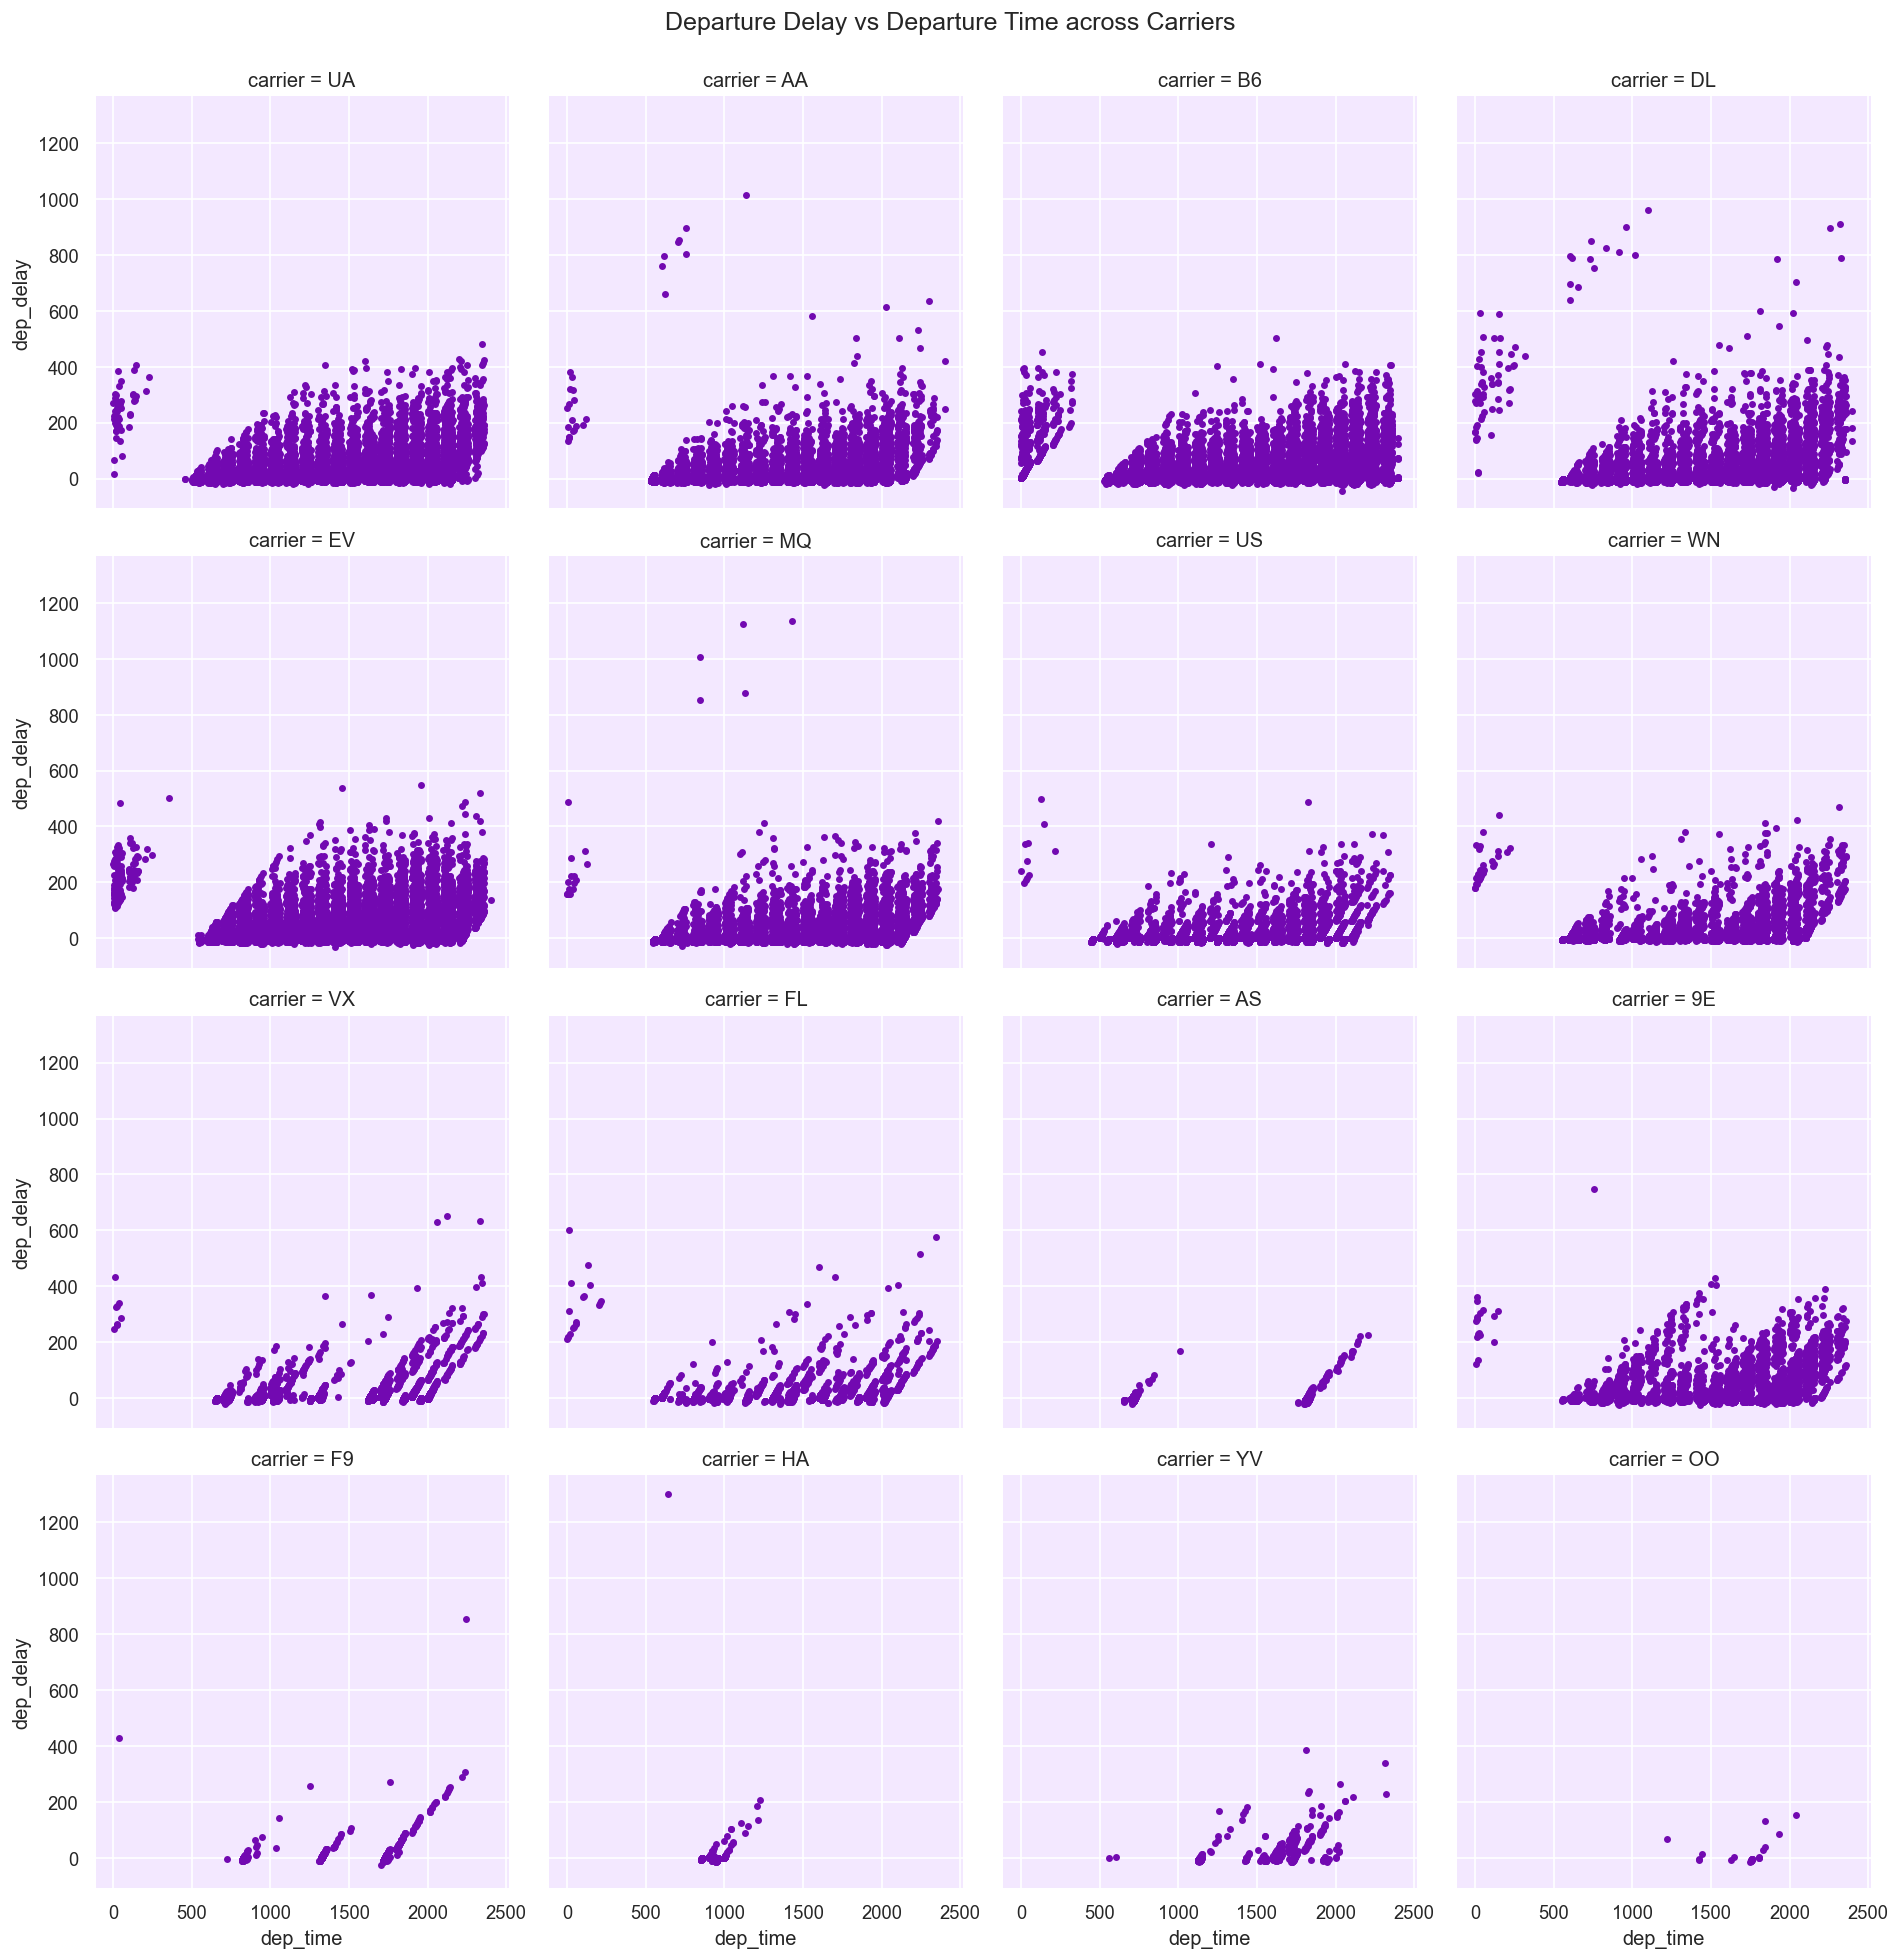

In [51]:
# 'dep_delay' vs 'dep_time' across different 'carrier'
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

**Inference:**

These scatter plots show the relationship between departure delay and departure time for different carriers. Some carriers show a more pronounced trend of increased departure delay with later departure times, while others do not. This suggests that the interaction between carrier and departure time could be a significant factor influencing arrival delay.

#### `dep_delay` vs `dep_time` across different `origin`

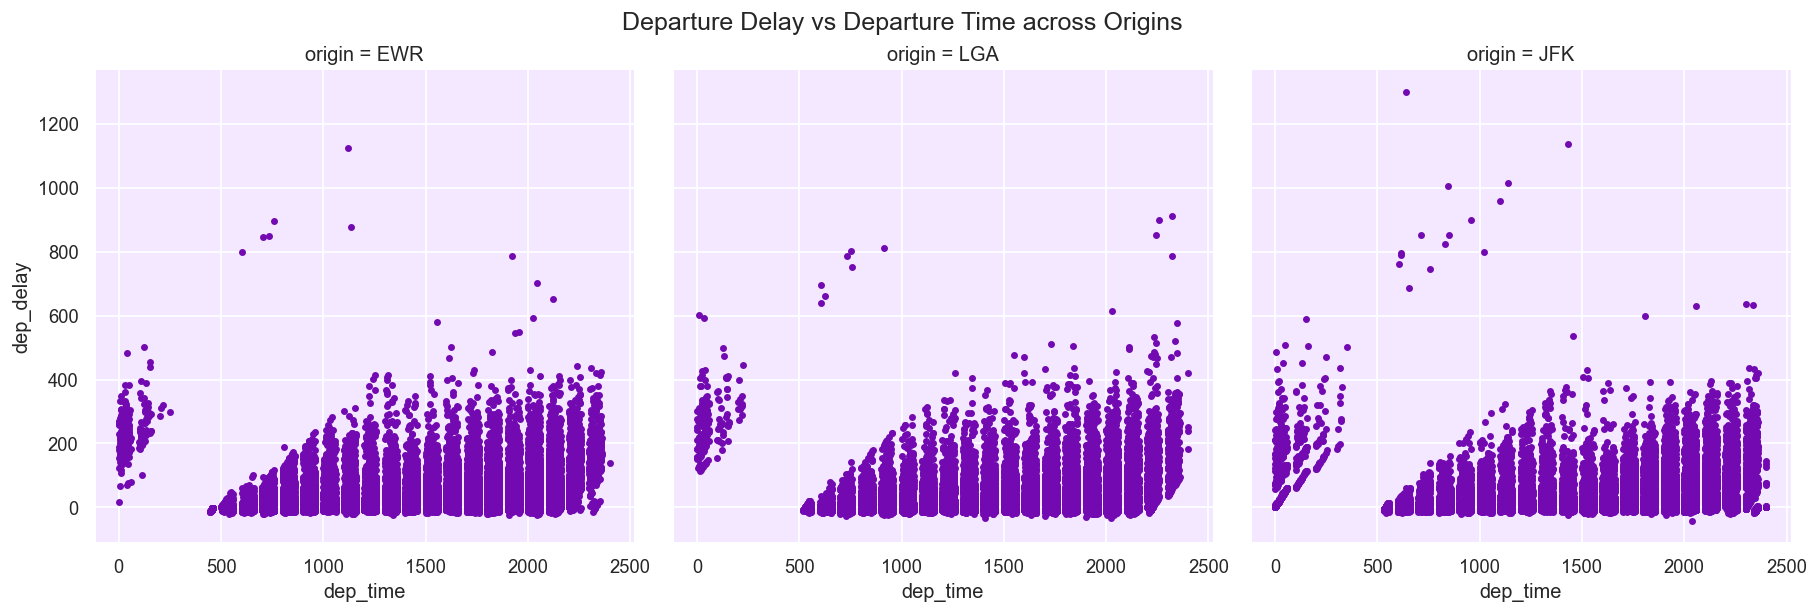

In [52]:
# 'dep_delay' vs 'dep_time' across different 'origin'
g = sns.FacetGrid(df, col="origin", col_wrap=4, height=5, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Origins', fontsize=15, y=1.02, x=0.38)
plt.show()

**Inference:**

These scatter plots show the relationship between departure delay and departure time for flights from different origins. Similar to the carrier plots, some origin airports show a more pronounced trend of increased departure delay with later departure times, while others do not. This suggests that the interaction between origin airport and departure time could also be a significant factor influencing arrival delay.

## 4. Data Preprocessing

### 4.1 Irrelevant Feature Removal

In [53]:
df.drop(['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

In [54]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')

### 4.2 Missing Value Treatment

**Missing data** can disrupt many machine learning algorithms. It's crucial to handle these appropriately. Depending on the nature of the data and the percentage of missing values, we can:

* Drop the rows or columns with missing data, especially if the percentage of missing data is very high.
* Fill the missing data with a central tendency measure (mean, median, or mode).
* Predict the missing values using a machine learning algorithm like KNN.
* Use algorithms that can handle missing values.

In [55]:
# Check the percentage of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns: \n", round(missing_percent,2))

Missing Value Percentage by Columns: 
 arr_delay         2.80
air_time          2.80
arr_time          2.59
dep_time          2.45
dep_delay         2.45
month             0.00
day               0.00
sched_dep_time    0.00
sched_arr_time    0.00
origin            0.00
dest              0.00
distance          0.00
name              0.00
dtype: float64


Some of the missing values belong to **target column (`arr_delay`)**. So, first I am going to drop rows with missing target values (`arr_delay`) to avoid introducing bias into our model. This is because we want our model to learn from actual observations, not from imputed values 

In [56]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True)

Then I am using a K-Nearest Neighbors (KNN) Imputer to fill in missing values in other columns. The KNN imputer is a more advanced imputation method that fills missing values based on similar observations, rather than just using the mean or median. This allows us to capture more complex patterns in the data, potentially leading to more accurate imputations.

In [57]:
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

0

**Note:**

The separation of features and target before imputation ensures that our imputation process is not influenced by the target values, thereby preventing data leakage.

### 4.3 Outlier Treatment

**In our flight delay data, these outliers represent the really long delays. These aren't errors or mistakes, they're a real part of flying that we want our model to learn from. So, we don't want to just throw these values ways.**

But we also don't want these outliers to have too much influence. So, we se something called **Box-Cox transformation** later. **This is a way of adjusting our data to make the outliers less extreme, without getting rid of them.** 

This way, our model can still learn from outliers - the really long delays - but they won't have an outsized impact. And this is important because even though our model, regression, is usually sensitive to outliers, we still want it to learn from all parts of our data.

### 4.4 Categorical Features Encoding

In [58]:
# Identify categorial columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

origin      3
dest      104
name       16
dtype: int64

We identified `origin`, `dest`, and `name` as **nominal categorical features** (containing categories without any inherent order). Before proceeding with encoding, however, it would be helpful to check how balanced the categories are within each feature. For example, if a feature has a category that is very rarely present in the data, one-hot encoding could result in a column with mostly zeros, which might not be very informative for the model

In [59]:
# Check the distribution of categories within each feature 
for col in cat_columns:
    print(f"\nDistribution of categories in {col}:")
    print(X[col].value_counts())


Distribution of categories in origin:
EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

Distribution of categories in dest:
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
       ...  
HDN       14
MTJ       14
SBN       10
ANC        8
LEX        1
Name: dest, Length: 104, dtype: int64

Distribution of categories in name:
United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: name, dtype: int64


Here's what we found:

* `name`: The `name` column has 16 unique categories, corresponding to different airline carriers. The distribution of categories is fairly balanced.

* `origin`: The `origin` column represents the airport from which the flight departed. There are 3 unique categories in this column, corresponding to three different airports. The distribution of categories is also quite balanced.

* `dest` : The `dest` column represents the airport at which the flight arrived. There are 105 unique categories in this column, which is quite high. Some destinations have many flights (like ORD, ATL, LAX), while others have very few (like LEX, LGA).

Based on the above observations, here's our plan for encoding:

* **One-hot Encoding**: We can apply one-hot encoding to the `origin`, and `name` columns. These columns have relatively few categories and are fairly balanced.

* **Frequency Encoding**: This method replaces each category in the feature with its frequency (i.e., the proportion of the total number of instances it represents). It's suitable for high-cardinality categorical features and does not introduce an arbitrary order. We will use this method for the `dest` feature, as it has a large number of unique categories, and the distribution is skewed, with some categories appearing much more frequently than others.

In [60]:
# Create a copy of the dataset for encoding
X_encoded = X.copy()

# Apply one-hot encoding to 'carrier', 'origin', and 'name'
X_encoded = pd.get_dummies(X_encoded, columns=['origin', 'name'], drop_first=True)

# Apply frequency encoding to 'dest'
dest_freq = X_encoded['dest'].value_counts() / len(X_encoded)
# calculate the frequencies
X_encoded['dest'] = X_encoded['dest'].map(dest_freq) # map frequencies to the feature

# Show the result
X_encoded.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,dest,air_time,distance,...,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_Hawaiian Airlines Inc.,name_JetBlue Airways,name_Mesa Airlines Inc.,name_SkyWest Airlines Inc.,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,1,1,517.0,515,2.0,830.0,819,0.021644,227.0,1400,...,0,0,0,0,0,0,0,0,1,0
1,1,1,533.0,529,4.0,850.0,830,0.021644,227.0,1416,...,0,0,0,0,0,0,0,0,1,0
2,1,1,542.0,540,2.0,923.0,850,0.035415,160.0,1089,...,0,0,0,0,0,0,0,0,0,0
3,1,1,544.0,545,-1.0,1004.0,1022,0.002713,183.0,1576,...,0,0,0,1,0,0,0,0,0,0
4,1,1,554.0,600,-6.0,812.0,837,0.051435,116.0,762,...,0,0,0,0,0,0,0,0,0,0


### 4.5 Time Feature Transformatiom

We can transform these time features into two dimensions using trigonometric functions, specifically sine and cosine, to map each time to a point on a circle. This way, times that are close to each other on the 24-hour clock, such as 2359 and 0001, will also be close to each other on the circle.

In [62]:
# Time Feature Transformation
def transform_time(df, columns):
    for col in columns:
        df[col + '_sin'] = np.sin(2 * np.pi * df[col]/2400)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col]/2400)
        df.drop(columns=col, inplace=True)
    return df

# List of 'hhmm' formatted features
time_cols = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']

# Apply transformation
X_encoded = transform_time(X_encoded, time_cols)

X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,1,2.0,0.021644,227.0,1400,0,0,0,0,...,1,0,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,1,4.0,0.021644,227.0,1416,0,1,0,0,...,1,0,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,1,2.0,0.035415,160.0,1089,1,0,0,1,...,0,0,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,1,-1.0,0.002713,183.0,1576,1,0,0,0,...,0,0,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,1,-6.0,0.051435,116.0,762,0,1,0,0,...,0,0,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


### 4.6 Feature Scaling

Now, let's discuss our data. Now, we have different types of features in our dataset: **continuous features, categorical features that have been one-hot encoded or frequency encoded, and cyclic features that have been transformed from time data.**

For the continuous features, we'll use standard scaling (or Z-score normalization). This not only scales the features to a common range but also **handles outliers** to a certain extent by centering the distribution around the mean with a unit standard deviation.

For the **categorical features** that have been transformed through frequency encoding, we should also apply standard scaling. Even though these features originated as categorical data, the encoding has transformed them into continuous features that can take on a range of values.

As for the **binary features resulting from one-hot encoding, and cyclic features resulting from time transformation**, we don't need to apply scaling. Binary features already have values of 0 or 1, which are within the range of scaled data. Furthermore, applying scaling to binary features could distort their clear, interpretable structure. Cyclic features, on the other hand, have been engineered to capture the cyclical nature of time data, and scaling these could distort this cyclical pattern.

In [68]:
# Define binary, cyclic, and continuous columns
binary_cols     = [col for col in X_encoded.columns if X_encoded[col].value_counts().index.isin([0,1]).all()] 
cyclic_cols     = [col for col in X_encoded.columns if col.endswith('_cos') or col.endswith('_sin')] 
continuous_cols = [col for col in X_encoded.columns if col not in binary_cols + cyclic_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
X_encoded[continuous_cols] = scaler.fit_transform(X_encoded[continuous_cols])

# Show the result
X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,-1.630263,-1.679414,-0.263447,-0.290559,0.814548,0.477816,0,0,0,0,...,1,0,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,-1.630263,-1.679414,-0.213529,-0.290559,0.814548,0.499558,0,1,0,0,...,1,0,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,-1.630263,-1.679414,-0.263447,0.558148,0.099410,0.055209,1,0,0,1,...,0,0,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,-1.630263,-1.679414,-0.338324,-1.457249,0.344905,0.716977,1,0,0,0,...,0,0,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,-1.630263,-1.679414,-0.463119,1.545420,-0.370233,-0.389140,0,1,0,0,...,0,0,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [69]:
binary_cols

['origin_JFK',
 'origin_LGA',
 'name_Alaska Airlines Inc.',
 'name_American Airlines Inc.',
 'name_Delta Air Lines Inc.',
 'name_Endeavor Air Inc.',
 'name_Envoy Air',
 'name_ExpressJet Airlines Inc.',
 'name_Frontier Airlines Inc.',
 'name_Hawaiian Airlines Inc.',
 'name_JetBlue Airways',
 'name_Mesa Airlines Inc.',
 'name_SkyWest Airlines Inc.',
 'name_Southwest Airlines Co.',
 'name_US Airways Inc.',
 'name_United Air Lines Inc.',
 'name_Virgin America']

In [70]:
cyclic_cols

['dep_time_sin',
 'dep_time_cos',
 'sched_dep_time_sin',
 'sched_dep_time_cos',
 'arr_time_sin',
 'arr_time_cos',
 'sched_arr_time_sin',
 'sched_arr_time_cos']

In [71]:
continuous_cols

['month', 'day', 'dep_delay', 'dest', 'air_time', 'distance']

### 4.7 Transforming Skewed Features

The **Box-Cox transformation** is typically applied to features that are continuous and have a skewed distribution. The goal of this transformation is to modify these variables so they have a more normal or Gaussian-like distribution. Many machine learning models perform better with normally distributed data, so this transformation can be an important step in preprocessing.

The features we would consider for a Box-Cox transformation are ones that are:

* **Continuous in nature.**
* **Have a skewed distribution.**

This means we **should not apply the Box-Cox transformation to:**

* **Binary features:** These features only contain two unique values (0 and 1). Their distribution isn't suited for a Box-Cox transformation.
* **Cyclic features:** These features have already been transformed to handle their cyclic nature. They're not typically skewed because they take on values in a circle, so a Box-Cox transformation would not be suitable.
* **Discrete features:** Features such as `month` and `day` are discrete and not strictly continuous, so they wouldn't typically be transformed using Box-Cox.
From the list of continuous variables, the features `dep_delay`, `air_time`, and `distance` could potentially benefit from a Box-Cox transformation, as these might contain skewed data.

To decide if a feature needs a Box-Cox transformation, we can use a **histogram** or a **Q-Q plot** to check the distribution of the data. If the distribution is significantly skewed, then it's a candidate for the Box-Cox transformation.

In [72]:
# Define the function to plot histograms with specified color
def plot_hist(column, title, xlabel, color, bins=30):
    sns.histplot(column, bins=bins, color=color, edgecolor='white', kde=True)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

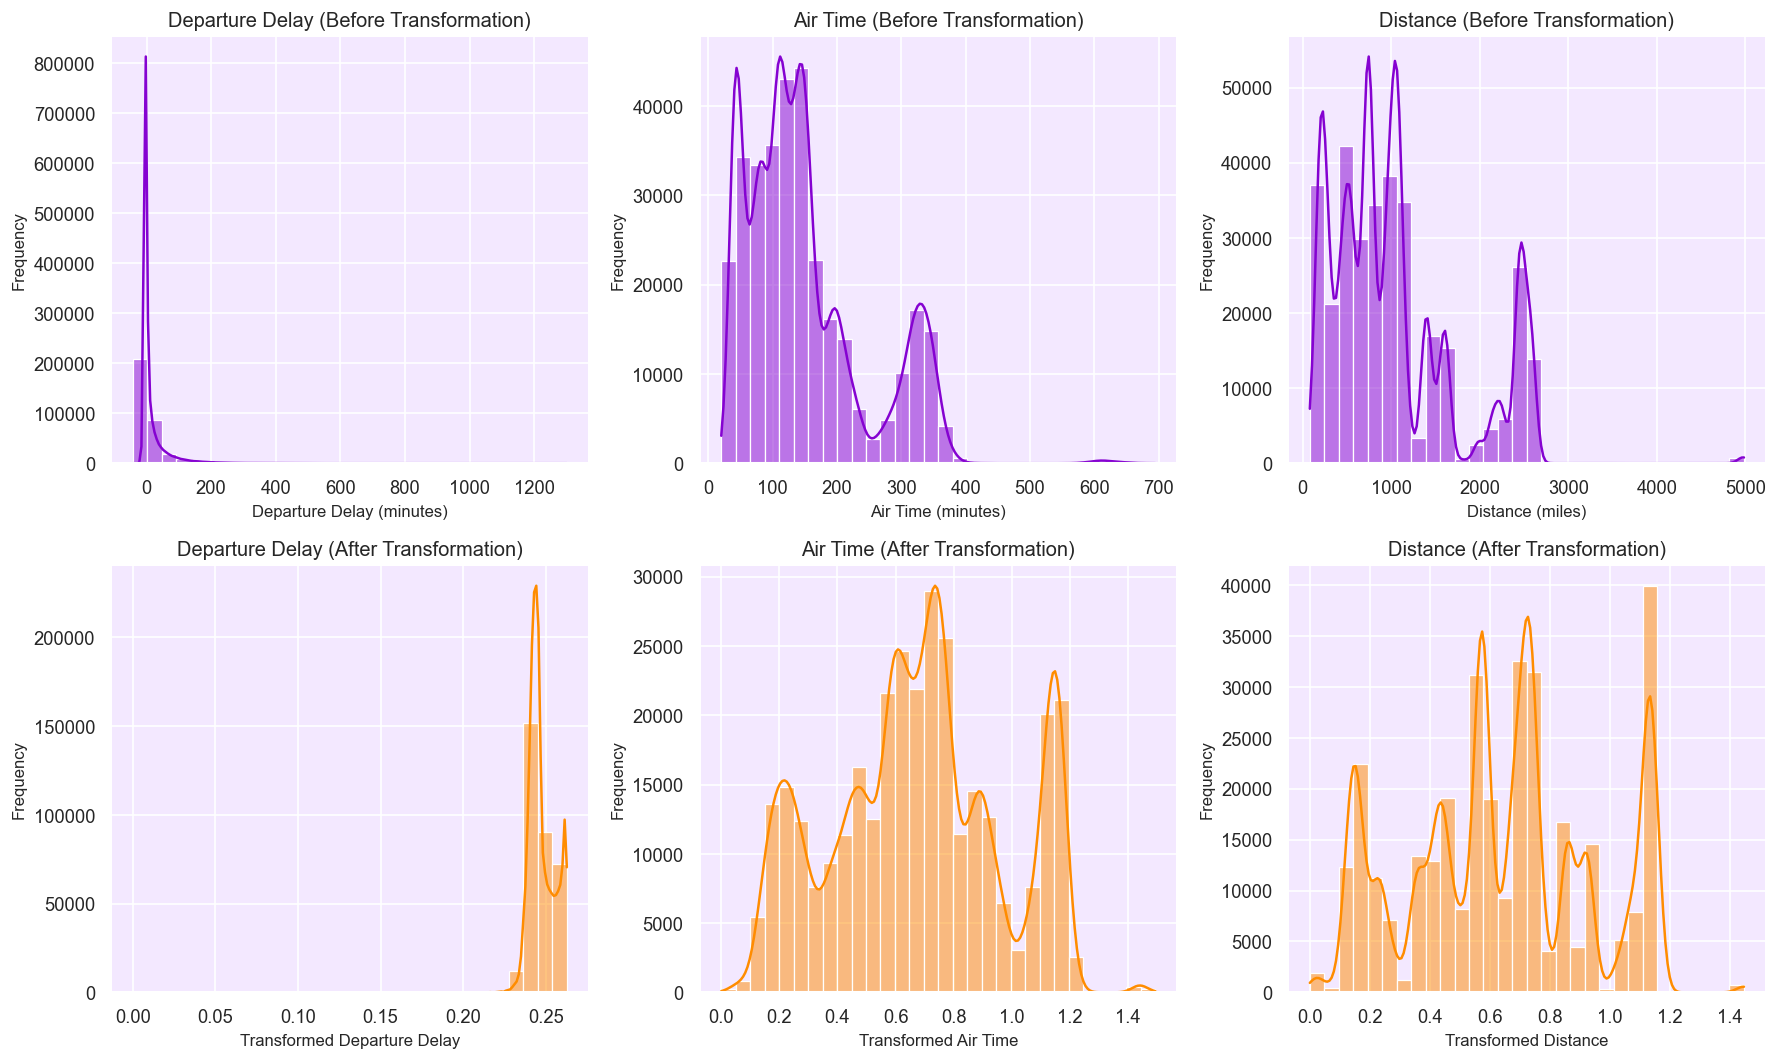

In [73]:
# Identify the features that might need a Box-Cox transformation
skewed_features = ['dep_delay', 'air_time', 'distance']

# Copy the dataset
X_transformed = X_encoded.copy()

# Apply Box-Cox transformation
for feature in skewed_features:
    # Adding a constant value to make all values positive
    X_transformed[feature] = X_transformed[feature] + abs(X_transformed[feature].min()) + 1
    X_transformed[feature], _ = stats.boxcox(X_transformed[feature])

    
# Plot histograms of 'dep_delay', 'air_time', and 'distance' before transformation
plt.figure(figsize=(15, 9))

plt.subplot(2, 3, 1)
plot_hist(df['dep_delay'], title='Departure Delay (Before Transformation)', xlabel='Departure Delay (minutes)', color='#8502d1')

plt.subplot(2, 3, 2)
plot_hist(df['air_time'], title='Air Time (Before Transformation)', xlabel='Air Time (minutes)', color='#8502d1')

plt.subplot(2, 3, 3)
plot_hist(df['distance'], title='Distance (Before Transformation)', xlabel='Distance (miles)', color='#8502d1')


# Plot histograms of 'dep_delay', 'air_time', and 'distance' after transformation
plt.subplot(2, 3, 4)
plot_hist(X_transformed['dep_delay'], title='Departure Delay (After Transformation)', xlabel='Transformed Departure Delay', color='darkorange')

plt.subplot(2, 3, 5)
plot_hist(X_transformed['air_time'], title='Air Time (After Transformation)', xlabel='Transformed Air Time', color='darkorange')

plt.subplot(2, 3, 6)
plot_hist(X_transformed['distance'], title='Distance (After Transformation)', xlabel='Transformed Distance', color='darkorange')

# Set global tick label size
plt.rcParams['xtick.labelsize'] = 'small'  # for x-axis
plt.rcParams['ytick.labelsize'] = 'small'  # for y-axis

plt.tight_layout()
plt.show()

The histograms above show the distributions of `dep_delay`, `air_time`, and `distance` before and after the **Box-Cox** transformation. In the first row, you can see the original distributions, which are right-skewed. After applying the Box-Cox transformation (shown in the second row), the features become more normally distributed, which is desirable for many machine learning models. **This transformation helps manage the influence of outliers and extreme values in these features, allowing the models to better learn from the data.**

In [74]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   month                          327346 non-null  float64
 1   day                            327346 non-null  float64
 2   dep_delay                      327346 non-null  float64
 3   dest                           327346 non-null  float64
 4   air_time                       327346 non-null  float64
 5   distance                       327346 non-null  float64
 6   origin_JFK                     327346 non-null  uint8  
 7   origin_LGA                     327346 non-null  uint8  
 8   name_Alaska Airlines Inc.      327346 non-null  uint8  
 9   name_American Airlines Inc.    327346 non-null  uint8  
 10  name_Delta Air Lines Inc.      327346 non-null  uint8  
 11  name_Endeavor Air Inc.         327346 non-null  uint8  
 12  name_Envoy Air                